<div style="width: 100%; overflow: hidden;">
    <div style="width: 150px; float: left;"> <img src="data/D4Sci_logo_ball.png" alt="Data For Science, Inc" align="left" border="0"> </div>
    <div style="float: left; margin-left: 10px;"> <h1>Advanced Time Series Analysis</h1>
<h1>GARCH Models</h1>
        <p>Bruno Gonçalves<br/>
        <a href="http://www.data4sci.com/">www.data4sci.com</a><br/>
            @bgoncalves, @data4sci</p></div>
</div>

In [1]:
from collections import Counter
from pprint import pprint

import pandas as pd
import numpy as np

import matplotlib
import matplotlib.pyplot as plt 

import statsmodels.api as sm

import arch
from arch import arch_model

import watermark

%load_ext watermark
%matplotlib inline

We start by print out the versions of the libraries we're using for future reference

In [2]:
%watermark -n -v -m -g -iv

Python implementation: CPython
Python version       : 3.8.5
IPython version      : 7.19.0

Compiler    : Clang 10.0.0 
OS          : Darwin
Release     : 20.6.0
Machine     : x86_64
Processor   : i386
CPU cores   : 16
Architecture: 64bit

Git hash: 962ea1dd51671b23bbe1a5dea4efbe651e18230c

statsmodels: 0.12.0
arch       : 4.15
numpy      : 1.19.2
pandas     : 1.1.3
matplotlib : 3.3.2
json       : 2.0.9
watermark  : 2.1.0



Load default figure style

In [3]:
plt.style.use('./d4sci.mplstyle')

## Simulating  ARCH Models

__time_series_plot__ and simulation code inspired by http://www.blackarbs.com/blog/time-series-analysis-in-python-linear-models-to-garch/11/1/2016

In [4]:
def time_series_plot(y, title=None):
    fig, axs_lst = plt.subplots(3, 1)
    
    if title is not None:
        axs_lst[0].set_title(title)
    
    y.plot(ax=axs_lst[0])
    sm.tsa.graphics.plot_acf(y, ax=axs_lst[1], alpha=0.5)
    sm.tsa.graphics.plot_pacf(y, ax=axs_lst[2], alpha=0.5)

    plt.tight_layout()

In [5]:
def ARCH(a0, a1):
    y = w = np.random.normal(size=1000)
    Y = np.empty_like(y)

    for t in range(len(y)):
        Y[t] = w[t] * np.sqrt((a0 + a1*y[t-1]**2))
    
    return pd.Series(Y)

In [6]:
Y = ARCH(2, 0.3)

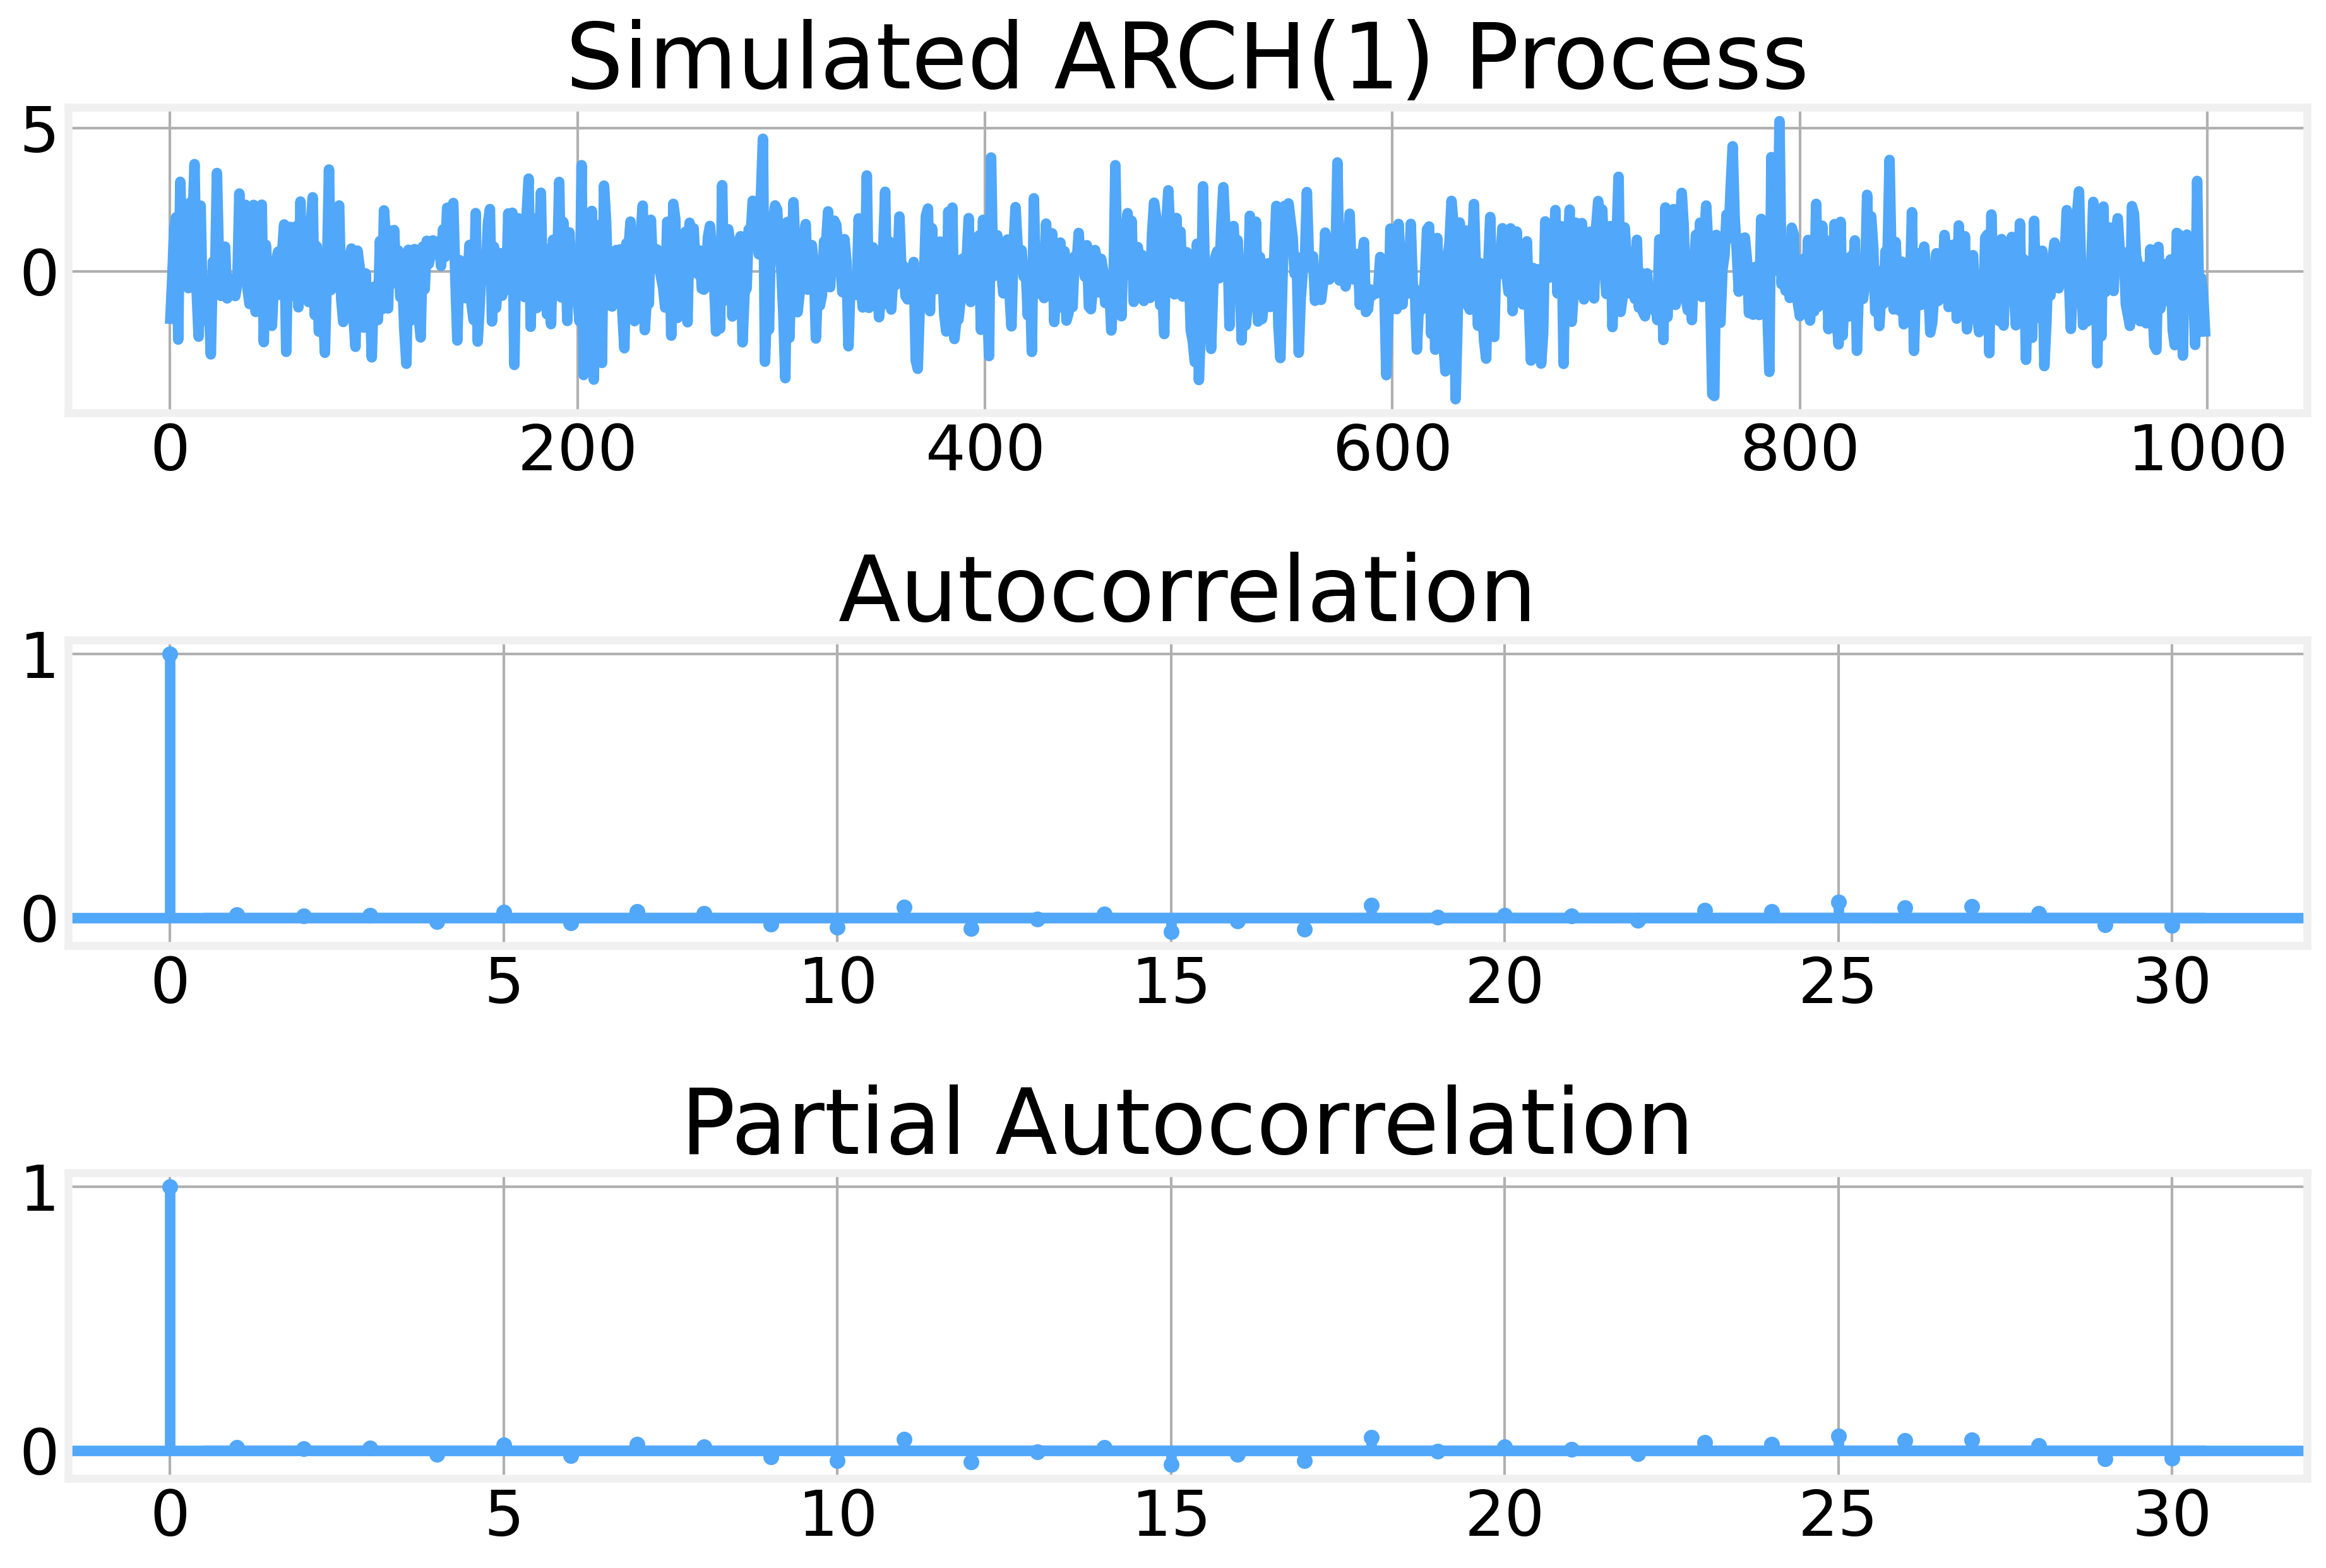

In [7]:
time_series_plot(Y, title='Simulated ARCH(1) Process')

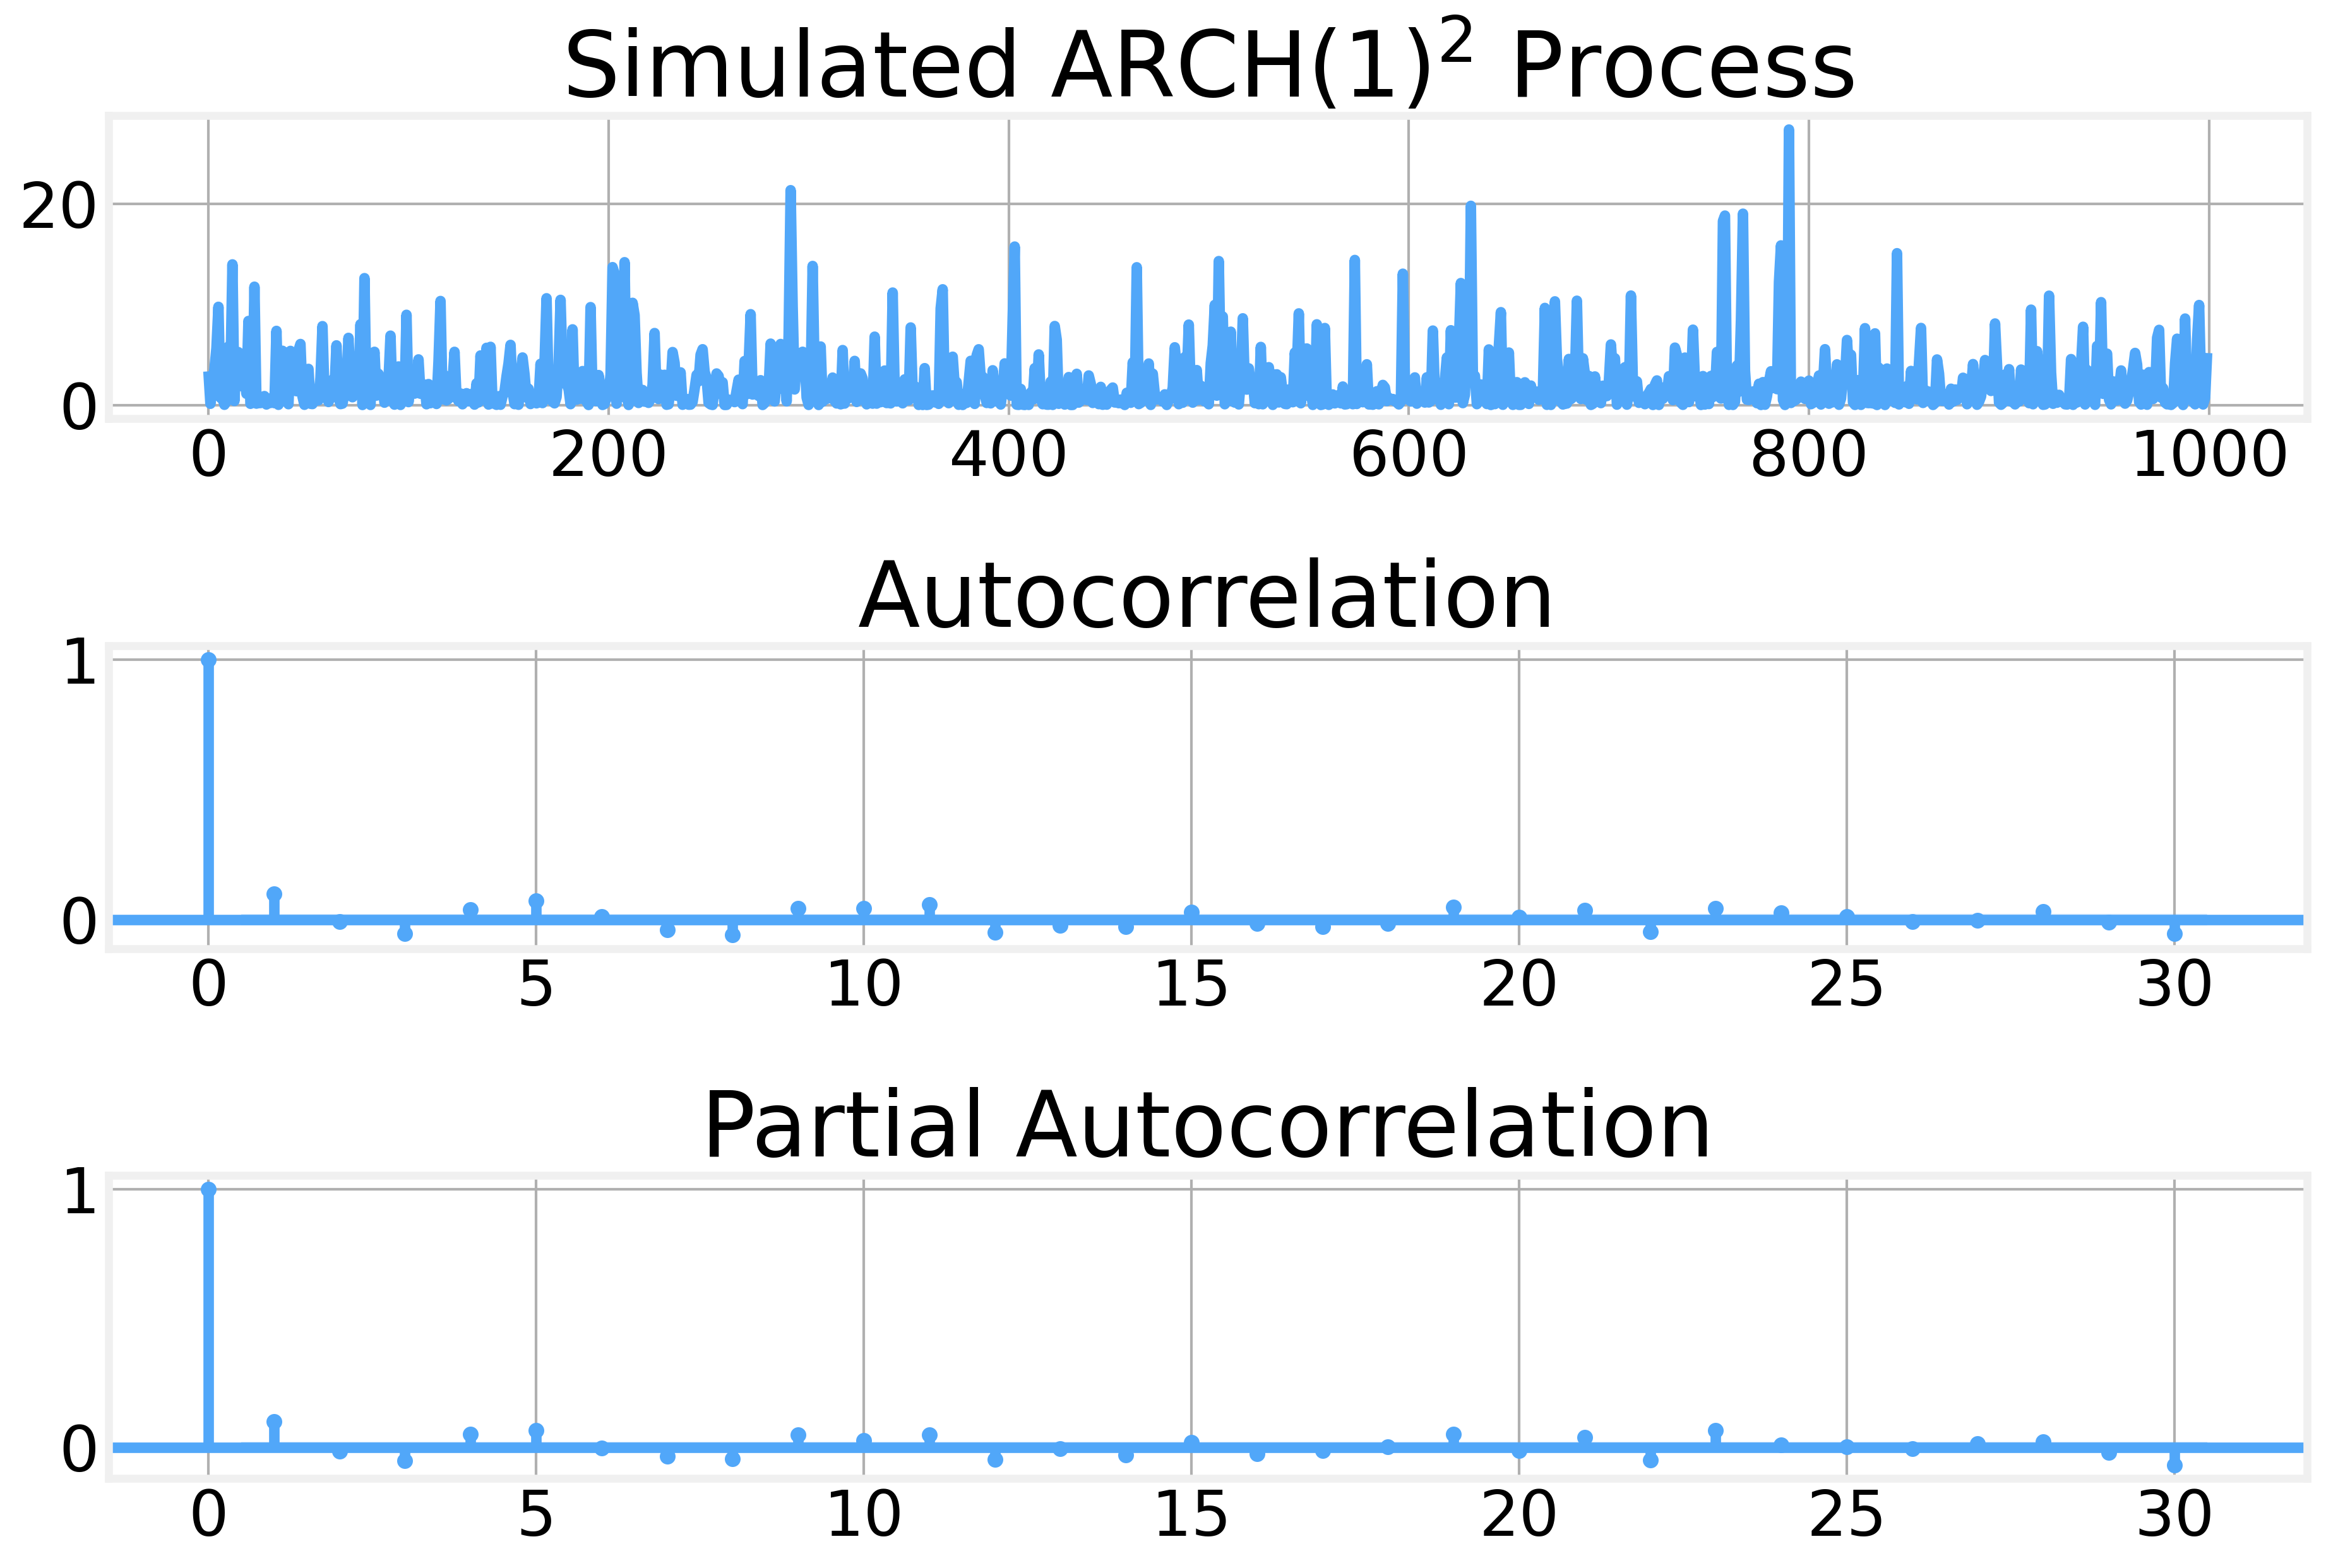

In [8]:
time_series_plot(Y**2, title=r'Simulated ARCH(1)${}^2$ Process')

## GARCH(1,1) Model

In [9]:
def GARCH(a0, a1, b1):
    n = 10000
    w = np.random.normal(size=n)
    eps = np.zeros_like(w)
    sigsq = np.zeros_like(w)

    for i in range(1, n):
        sigsq[i] = a0 + a1*(eps[i-1]**2) + b1*sigsq[i-1]
        eps[i] = w[i] * np.sqrt(sigsq[i])
    
    return pd.Series(eps)

In [10]:
eps = GARCH(0.2, 0.5, 0.3)

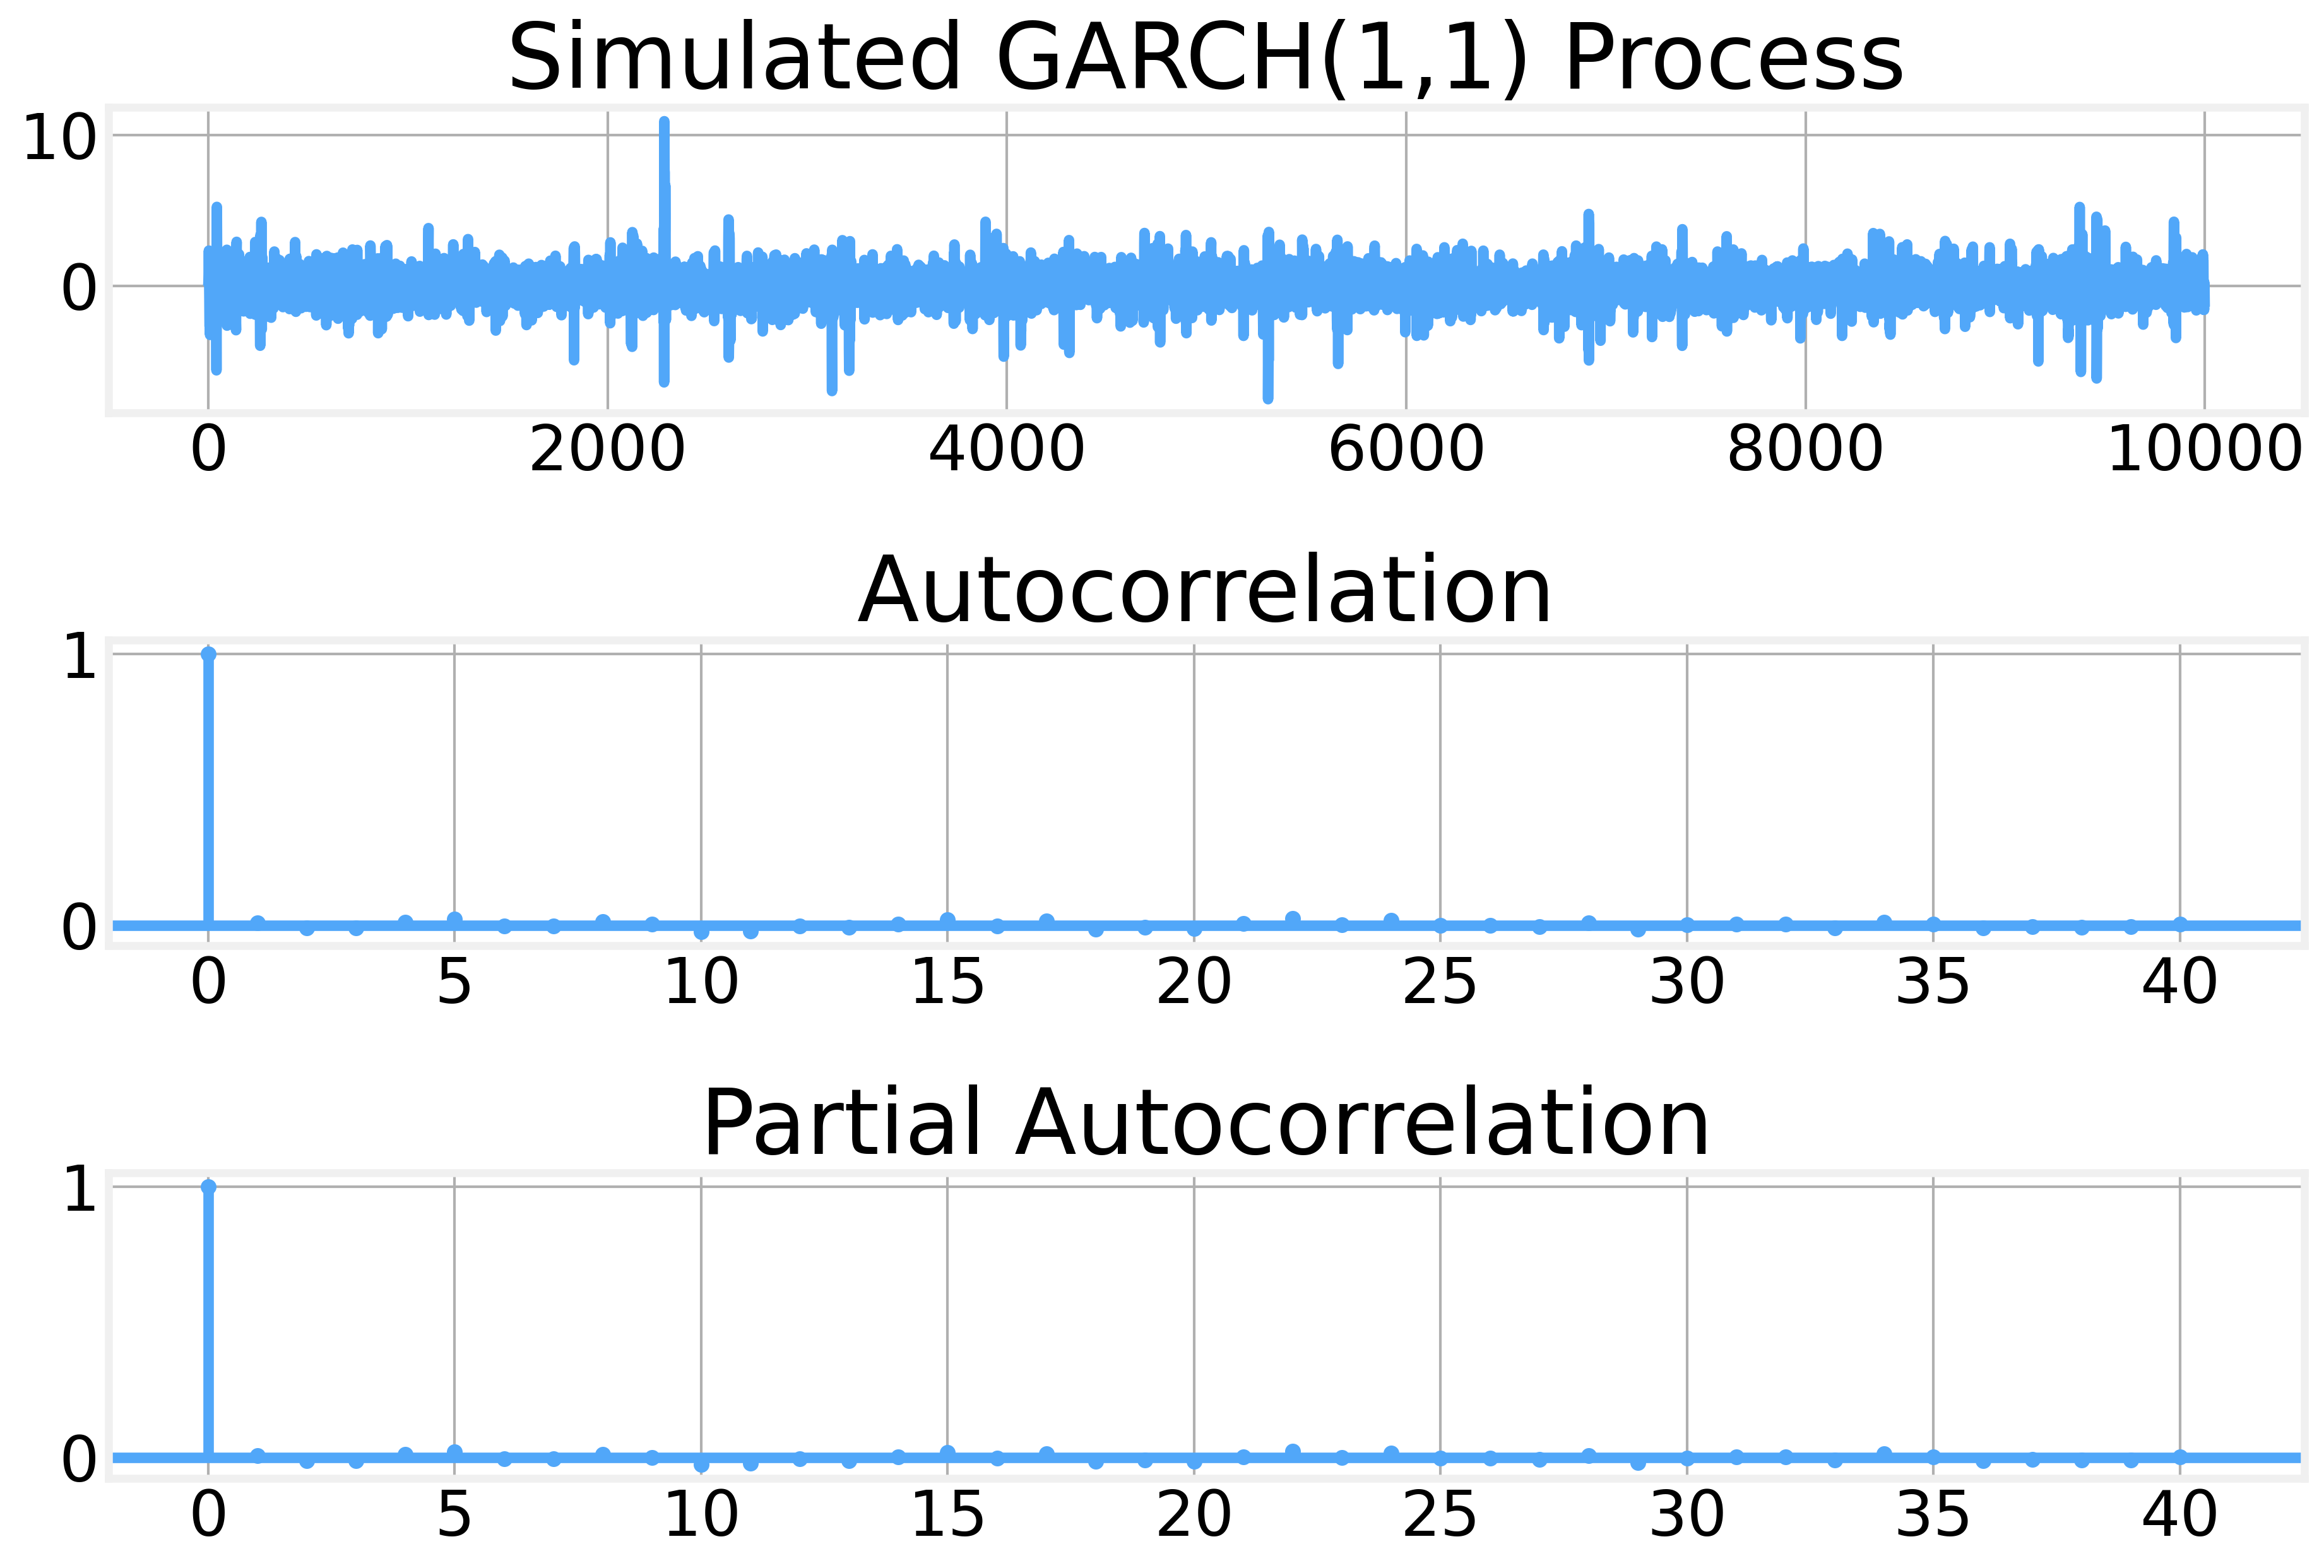

In [11]:
time_series_plot(eps, title='Simulated GARCH(1,1) Process')

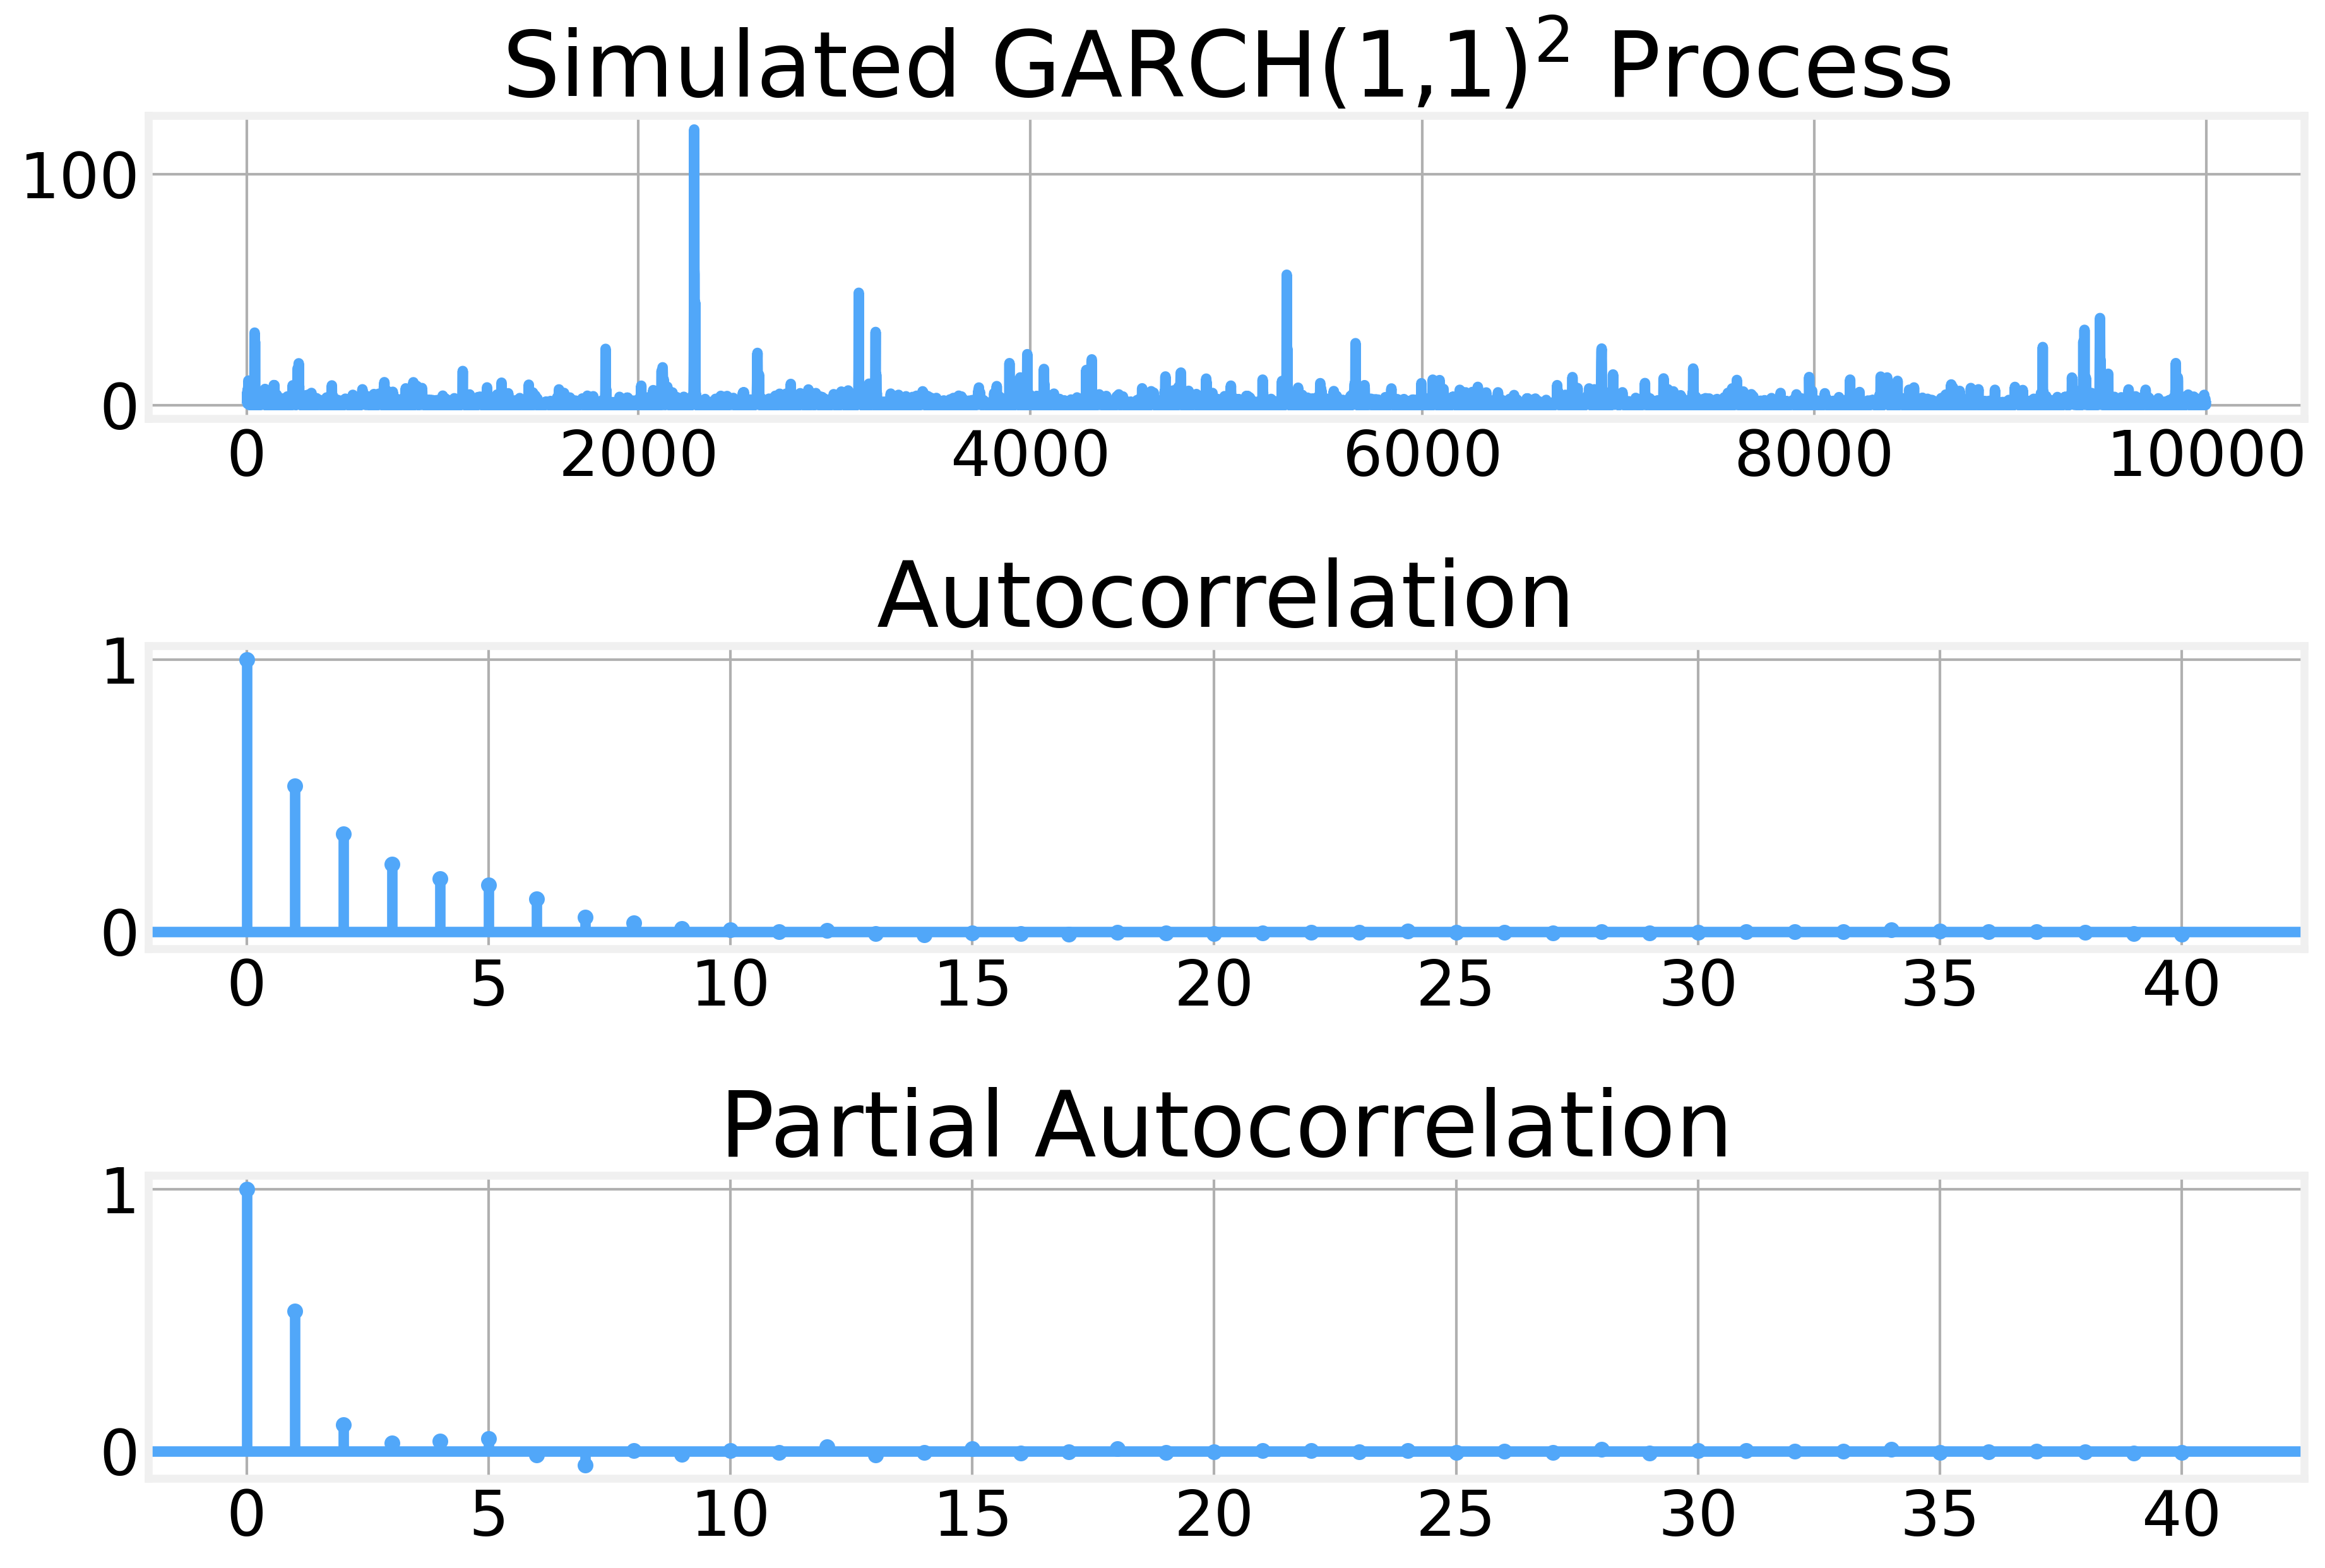

In [12]:
time_series_plot(eps**2, title=r'Simulated GARCH(1,1)${}^2$ Process')

## Fitting a model

In [13]:
DJIA = pd.read_csv('data/DJIA.csv', parse_dates=['DATE'], 
                   index_col=0, na_values='.')

<AxesSubplot:xlabel='DATE'>

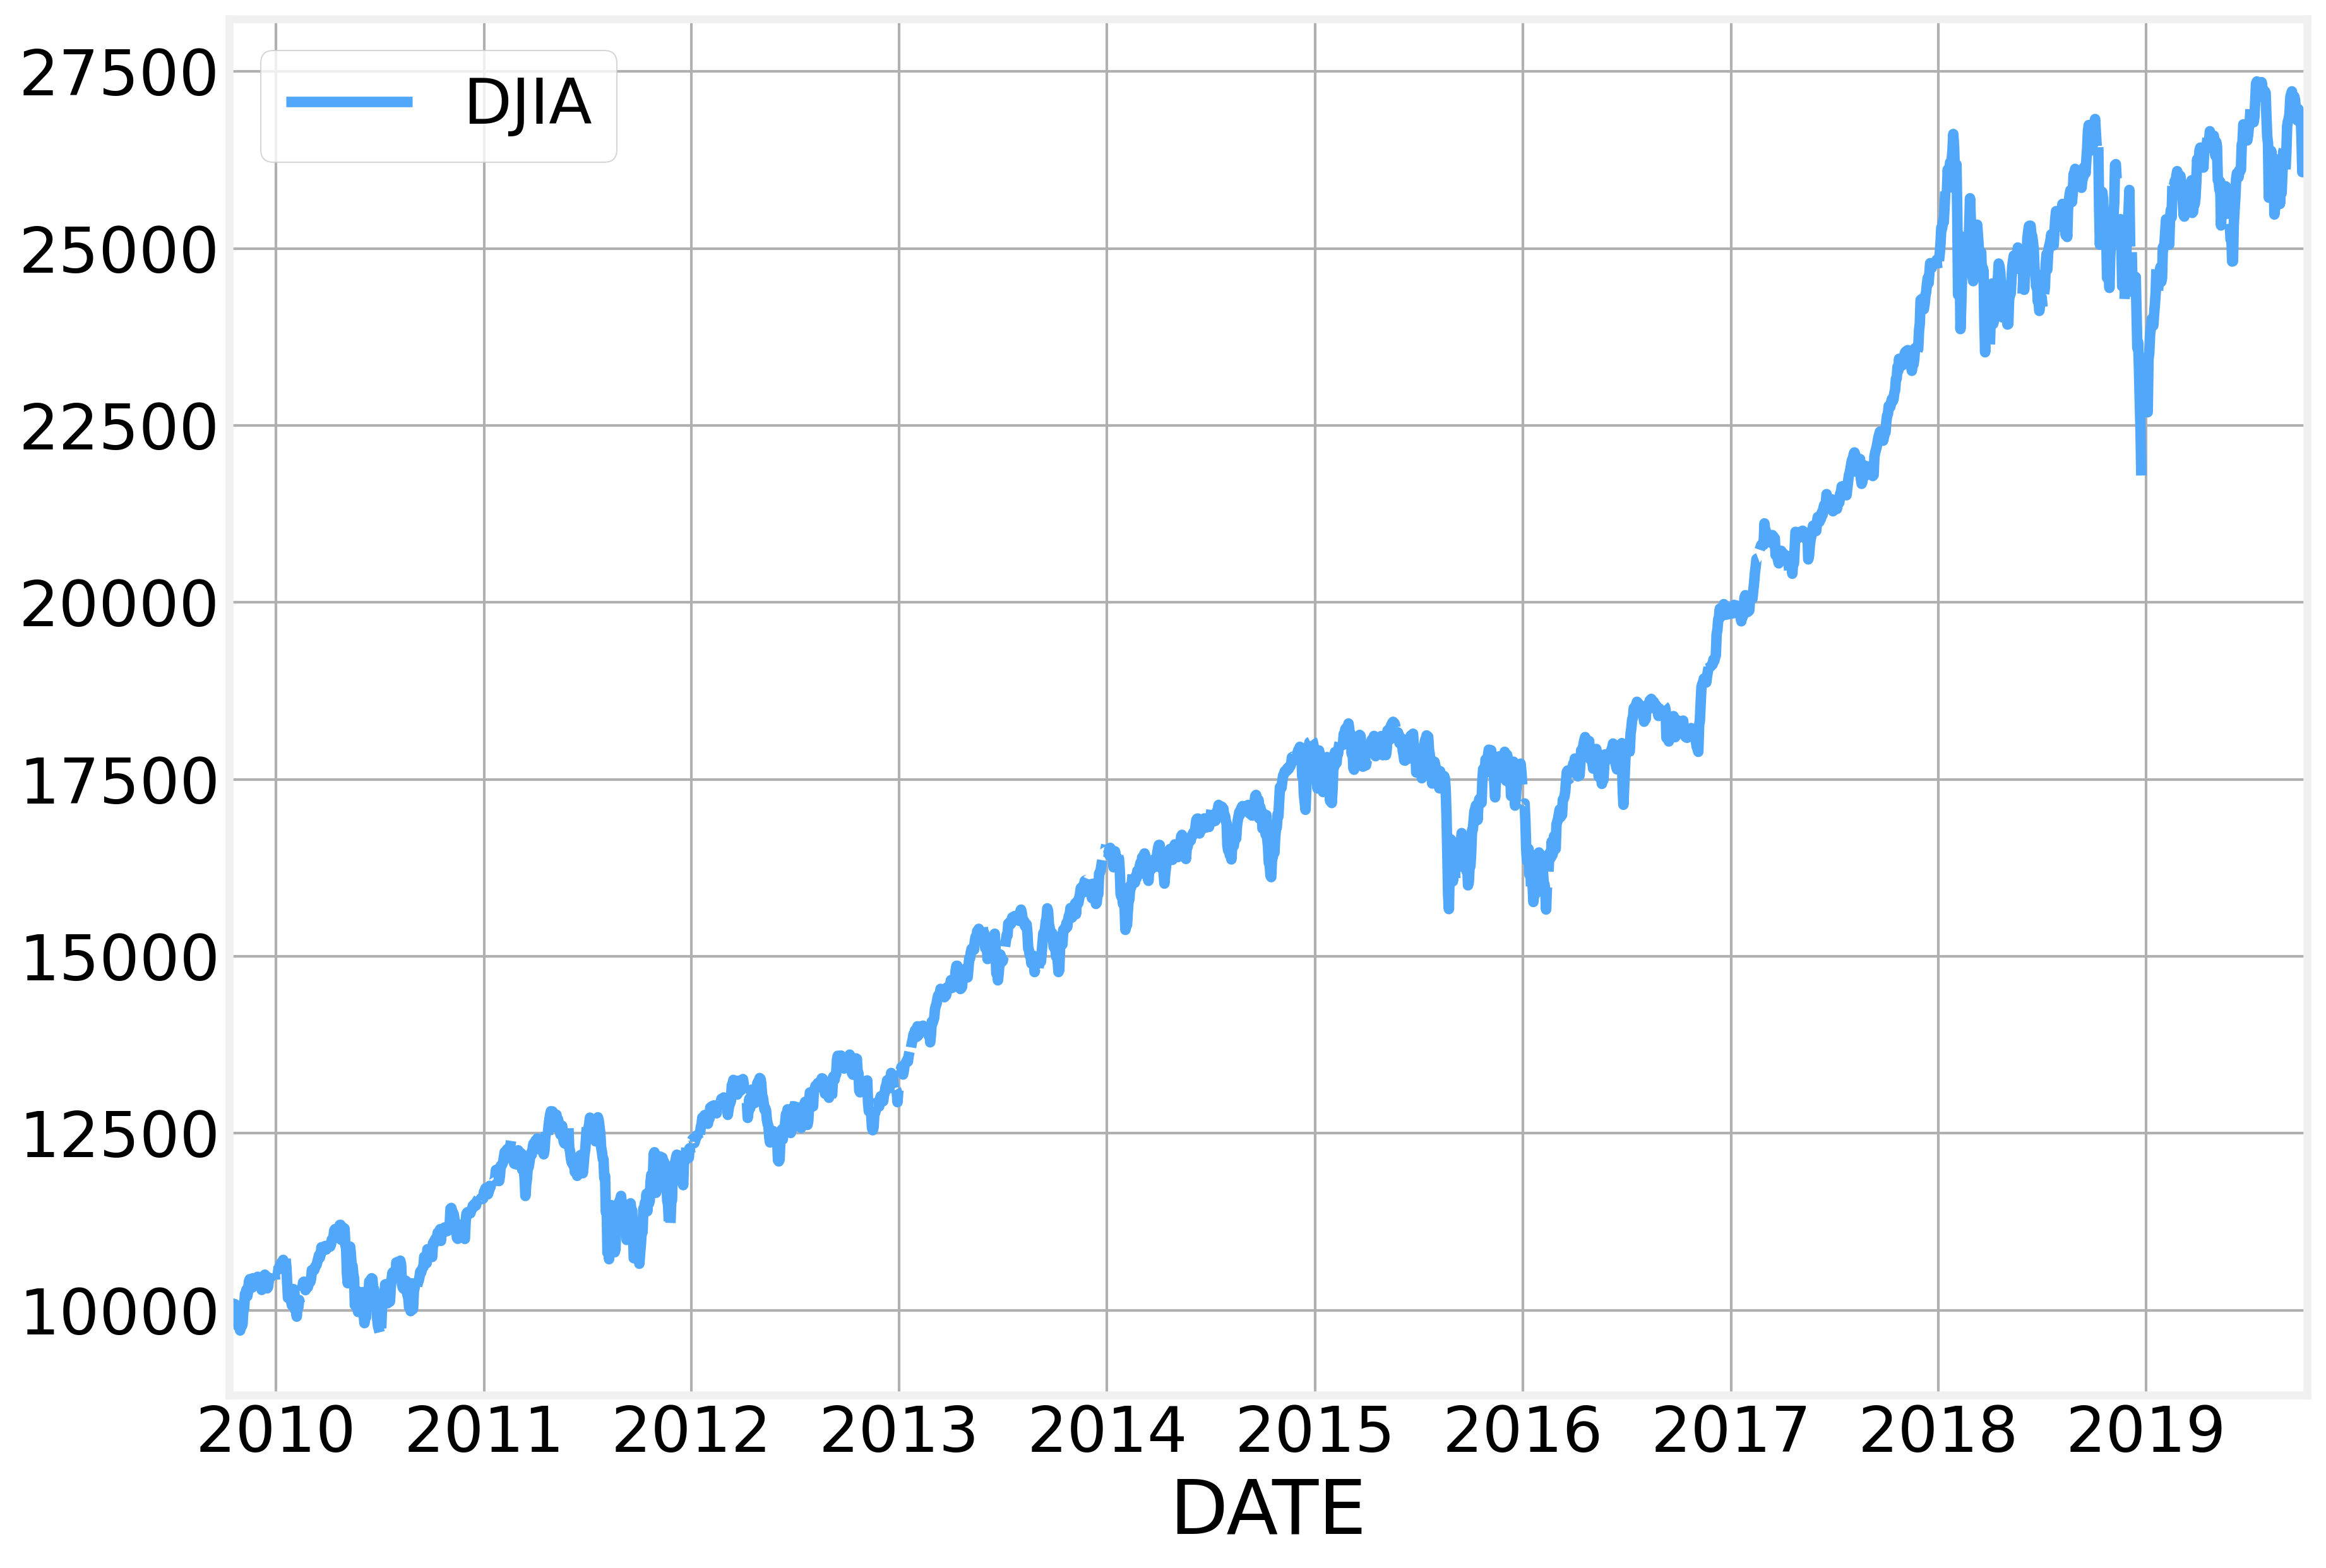

In [14]:
DJIA.plot()

Text(0, 0.5, 'DoD Return (%)')

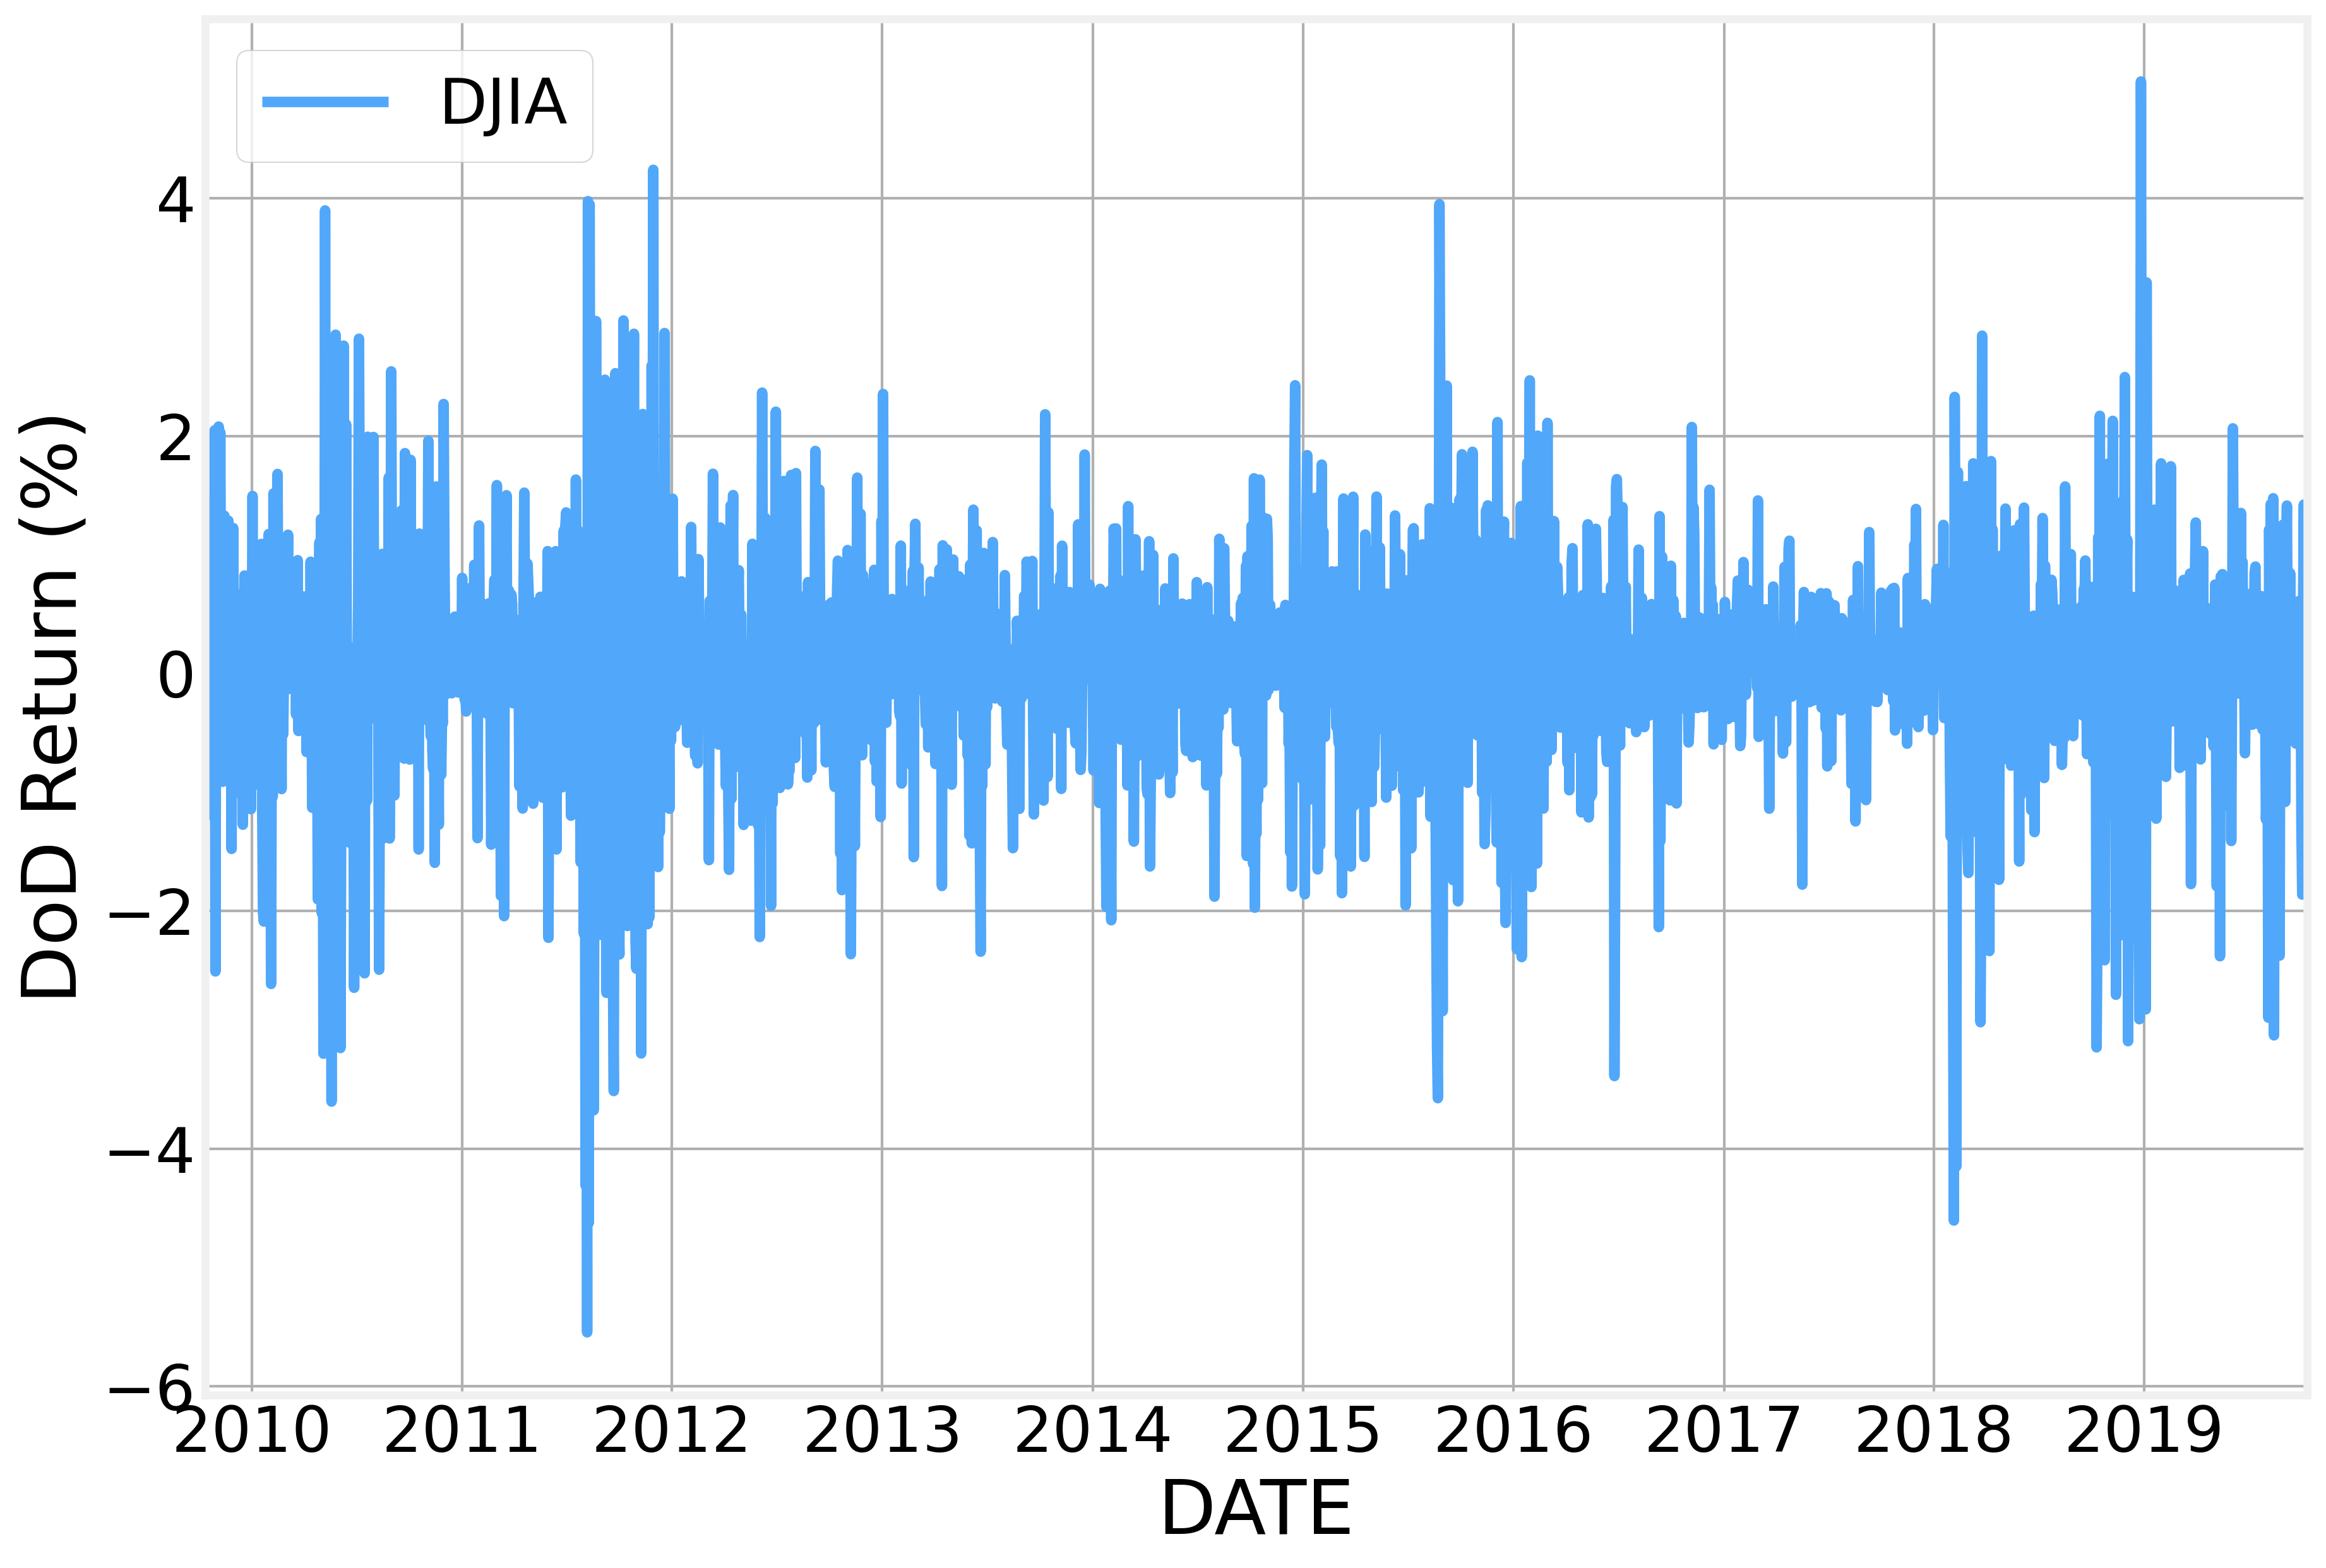

In [15]:
returns = 100 * DJIA.pct_change().dropna()
ax = returns.plot()
ax.set_ylabel('DoD Return (%)')

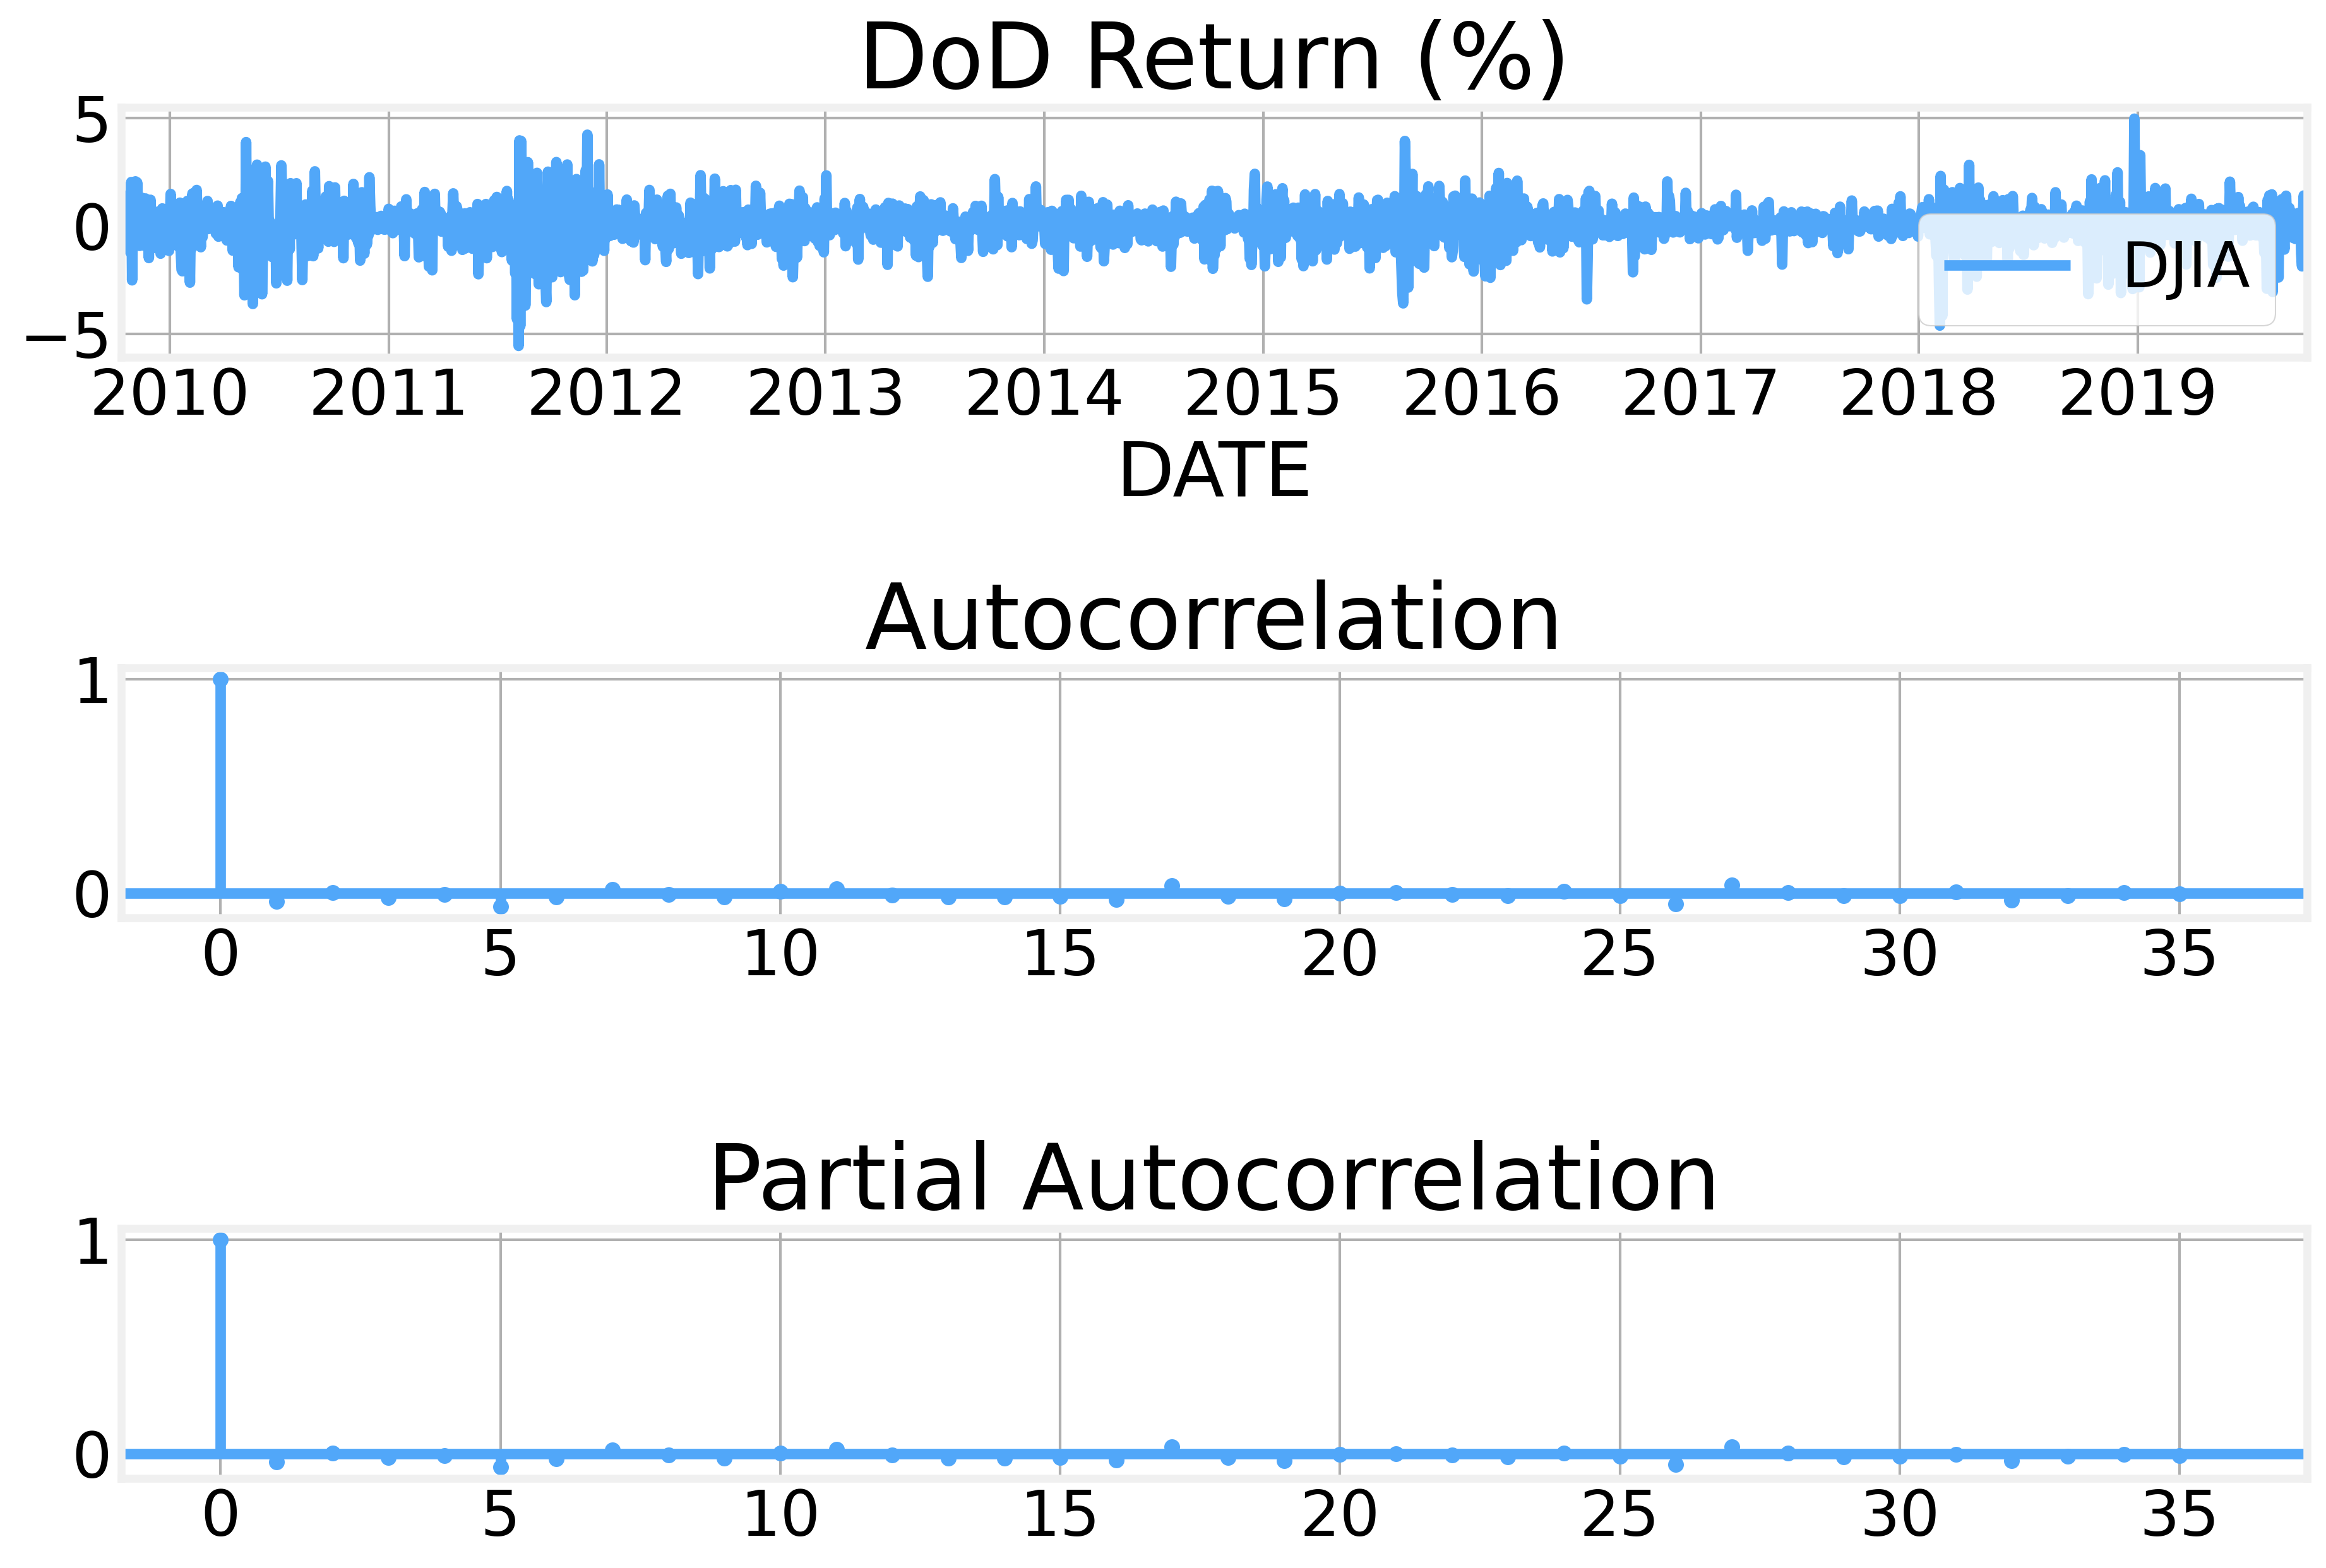

In [16]:
time_series_plot(returns, title='DoD Return (%)')

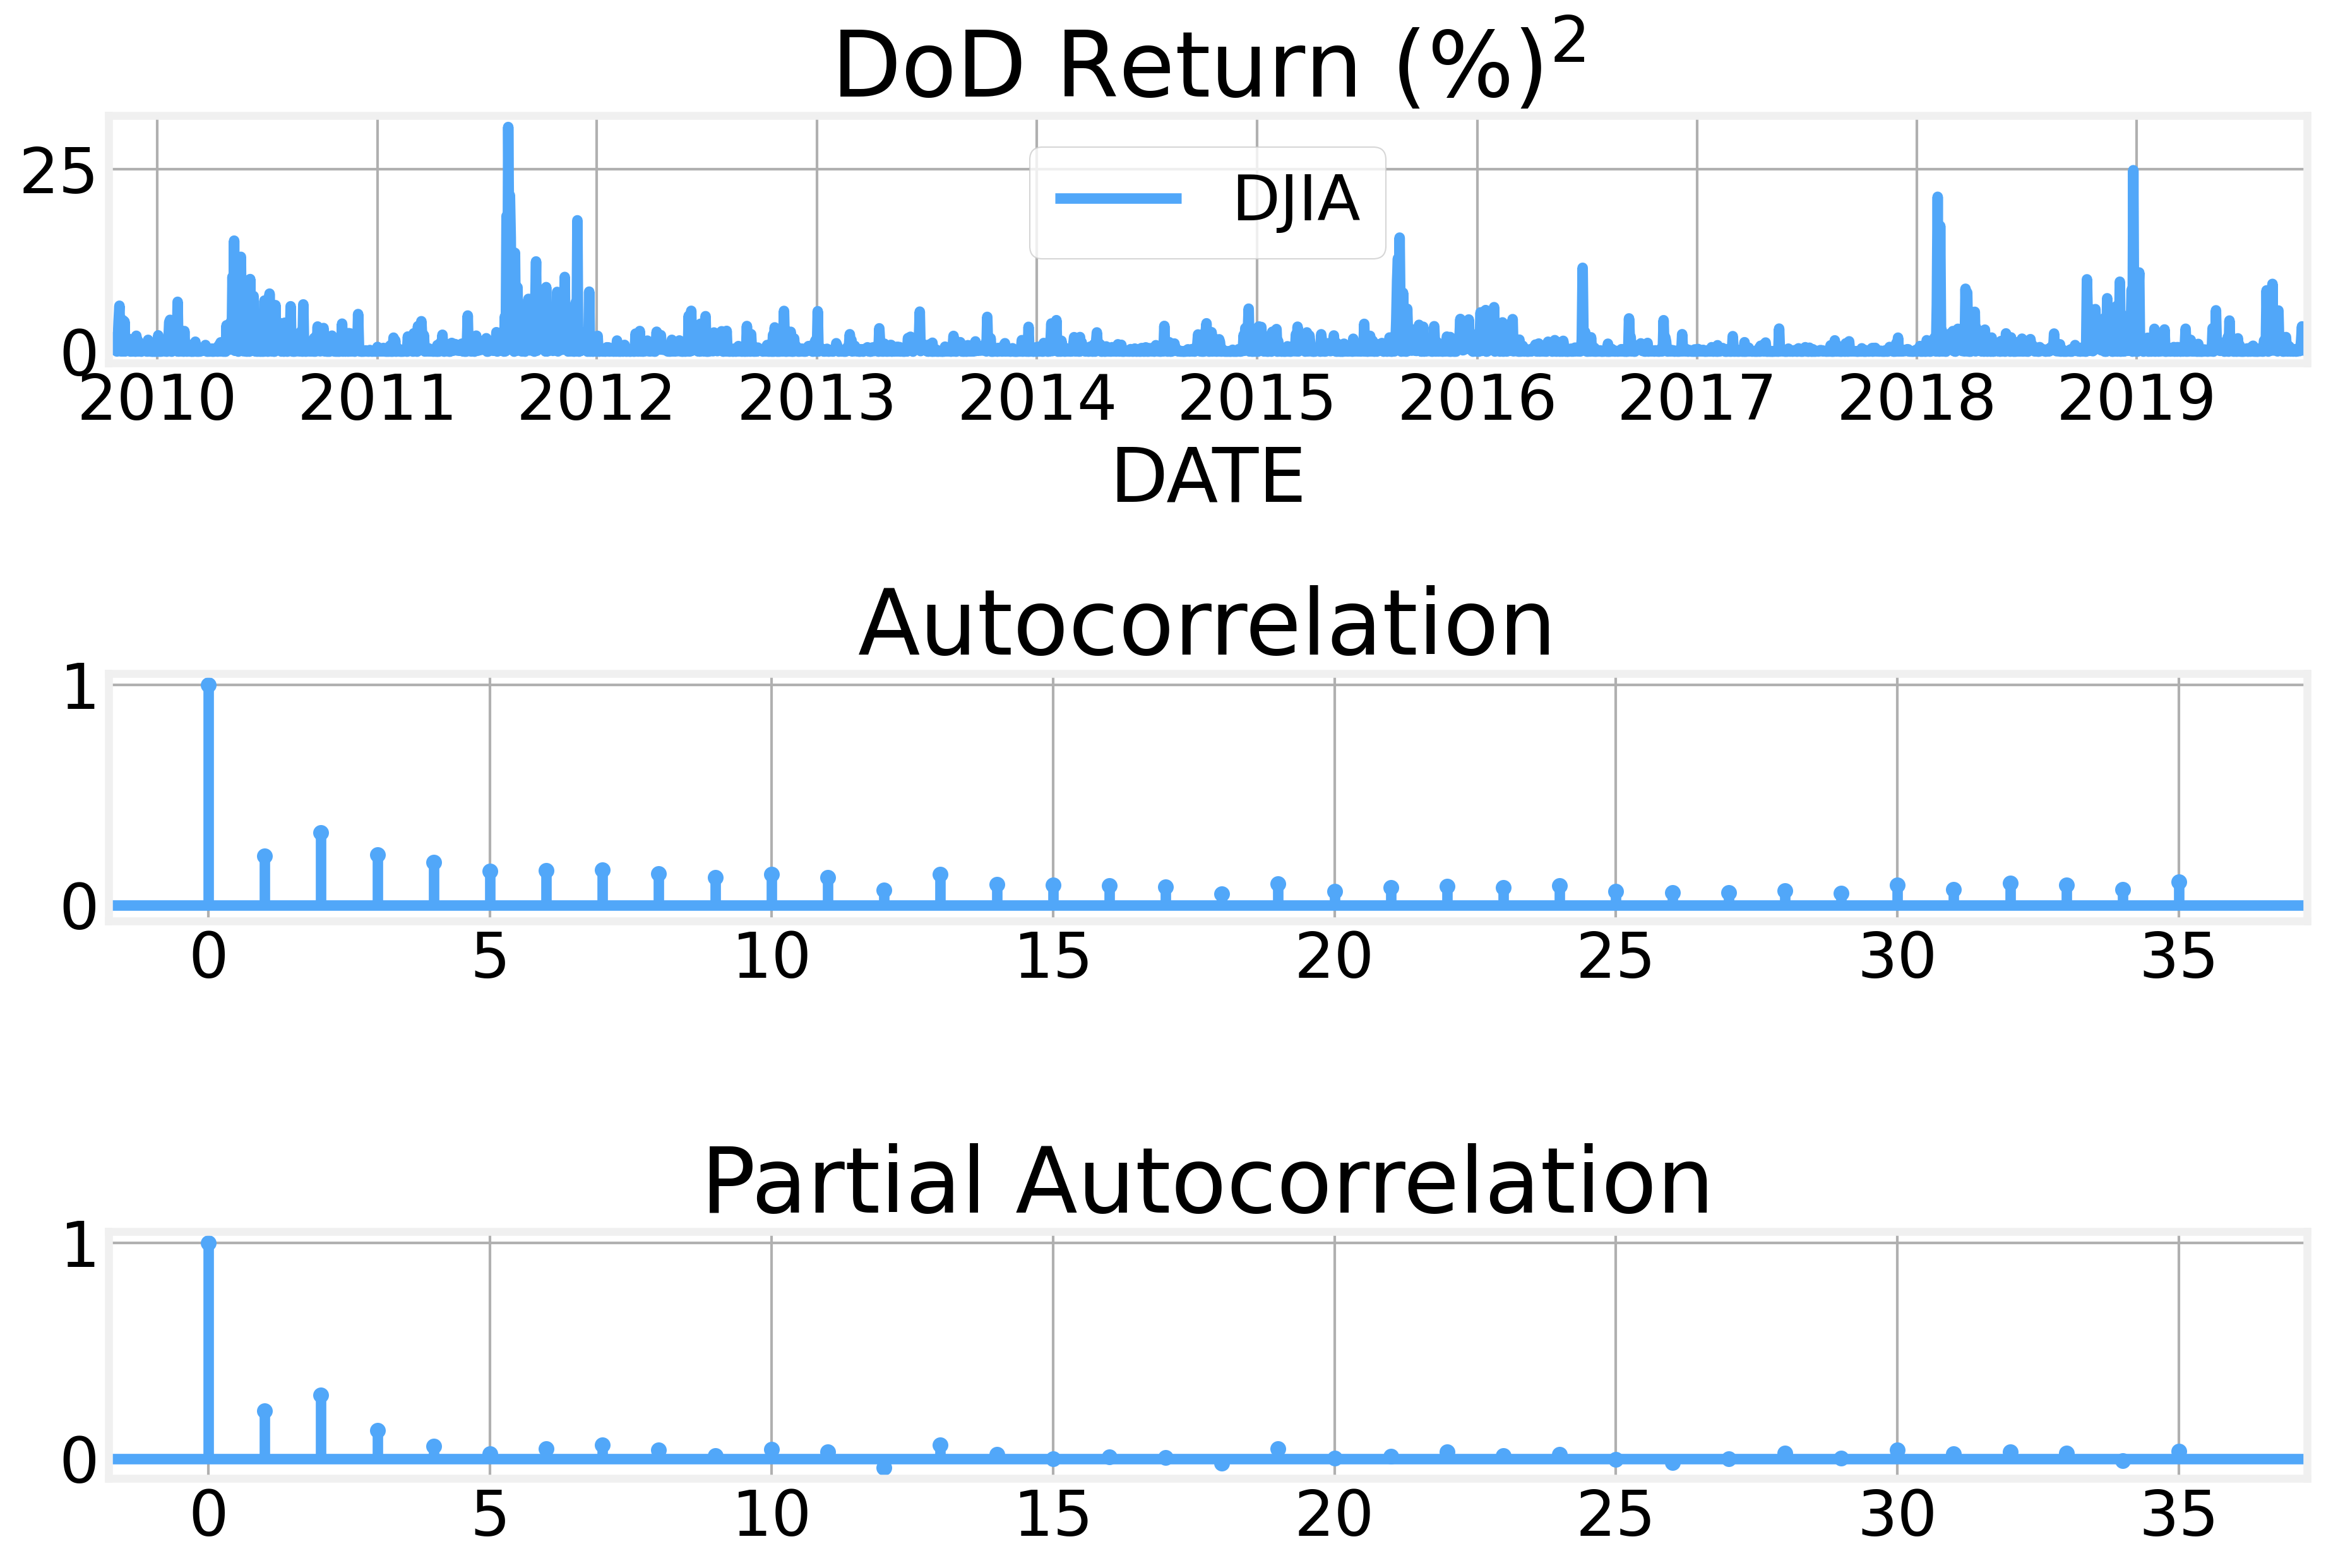

In [17]:
time_series_plot(returns**2, title=r'DoD Return (%)${}^2$')

## Train the GARCH Model

In [18]:
?arch_model

In [19]:
model = arch_model(returns, p=1, o=0, q=1)

In [20]:
model

Constant Mean(constant: yes, no. of exog: 0, volatility: GARCH(p: 1, q: 1), distribution: Normal distribution), id: 0x7fdff2c68b20

In [21]:
results = model.fit();

Iteration:      1,   Func. Count:      6,   Neg. LLF: 18470.573535942254
Iteration:      2,   Func. Count:     16,   Neg. LLF: 11663560915.491165
Iteration:      3,   Func. Count:     24,   Neg. LLF: 4096.988878825403
Iteration:      4,   Func. Count:     32,   Neg. LLF: 4413.530880344575
Iteration:      5,   Func. Count:     38,   Neg. LLF: 3008.5639449121054
Iteration:      6,   Func. Count:     44,   Neg. LLF: 3001.3302479774165
Iteration:      7,   Func. Count:     49,   Neg. LLF: 3000.934579582044
Iteration:      8,   Func. Count:     54,   Neg. LLF: 3000.923636215466
Iteration:      9,   Func. Count:     59,   Neg. LLF: 3000.9226292593758
Iteration:     10,   Func. Count:     64,   Neg. LLF: 3000.9225225921036
Iteration:     11,   Func. Count:     69,   Neg. LLF: 3000.9225186774793
Iteration:     12,   Func. Count:     73,   Neg. LLF: 3000.9225186775056
Optimization terminated successfully    (Exit mode 0)
            Current function value: 3000.9225186774793
            Iterati

In [22]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                   DJIA   R-squared:                      -0.001
Mean Model:             Constant Mean   Adj. R-squared:                 -0.001
Vol Model:                      GARCH   Log-Likelihood:               -3000.92
Distribution:                  Normal   AIC:                           6009.85
Method:            Maximum Likelihood   BIC:                           6033.31
                                        No. Observations:                 2608
Date:                Fri, Oct 15 2021   Df Residuals:                     2604
Time:                        22:06:30   Df Model:                            4
                                Mean Model                                
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu             0.0744  1.327e-02      5.608  2.043e-08 [4.840e-02,  0.100]
                              Volatility Model                              
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
omega          0.0318  6.646e-03      4.780  1.749e-06 [1.875e-02,4.480e-02]
alpha[1]       0.1587  2.316e-02      6.851  7.310e-12     [  0.113,  0.204]
beta[1]        0.8033  2.280e-02     35.232 6.527e-272     [  0.759,  0.848]
============================================================================

Covariance estimator: robust
"""

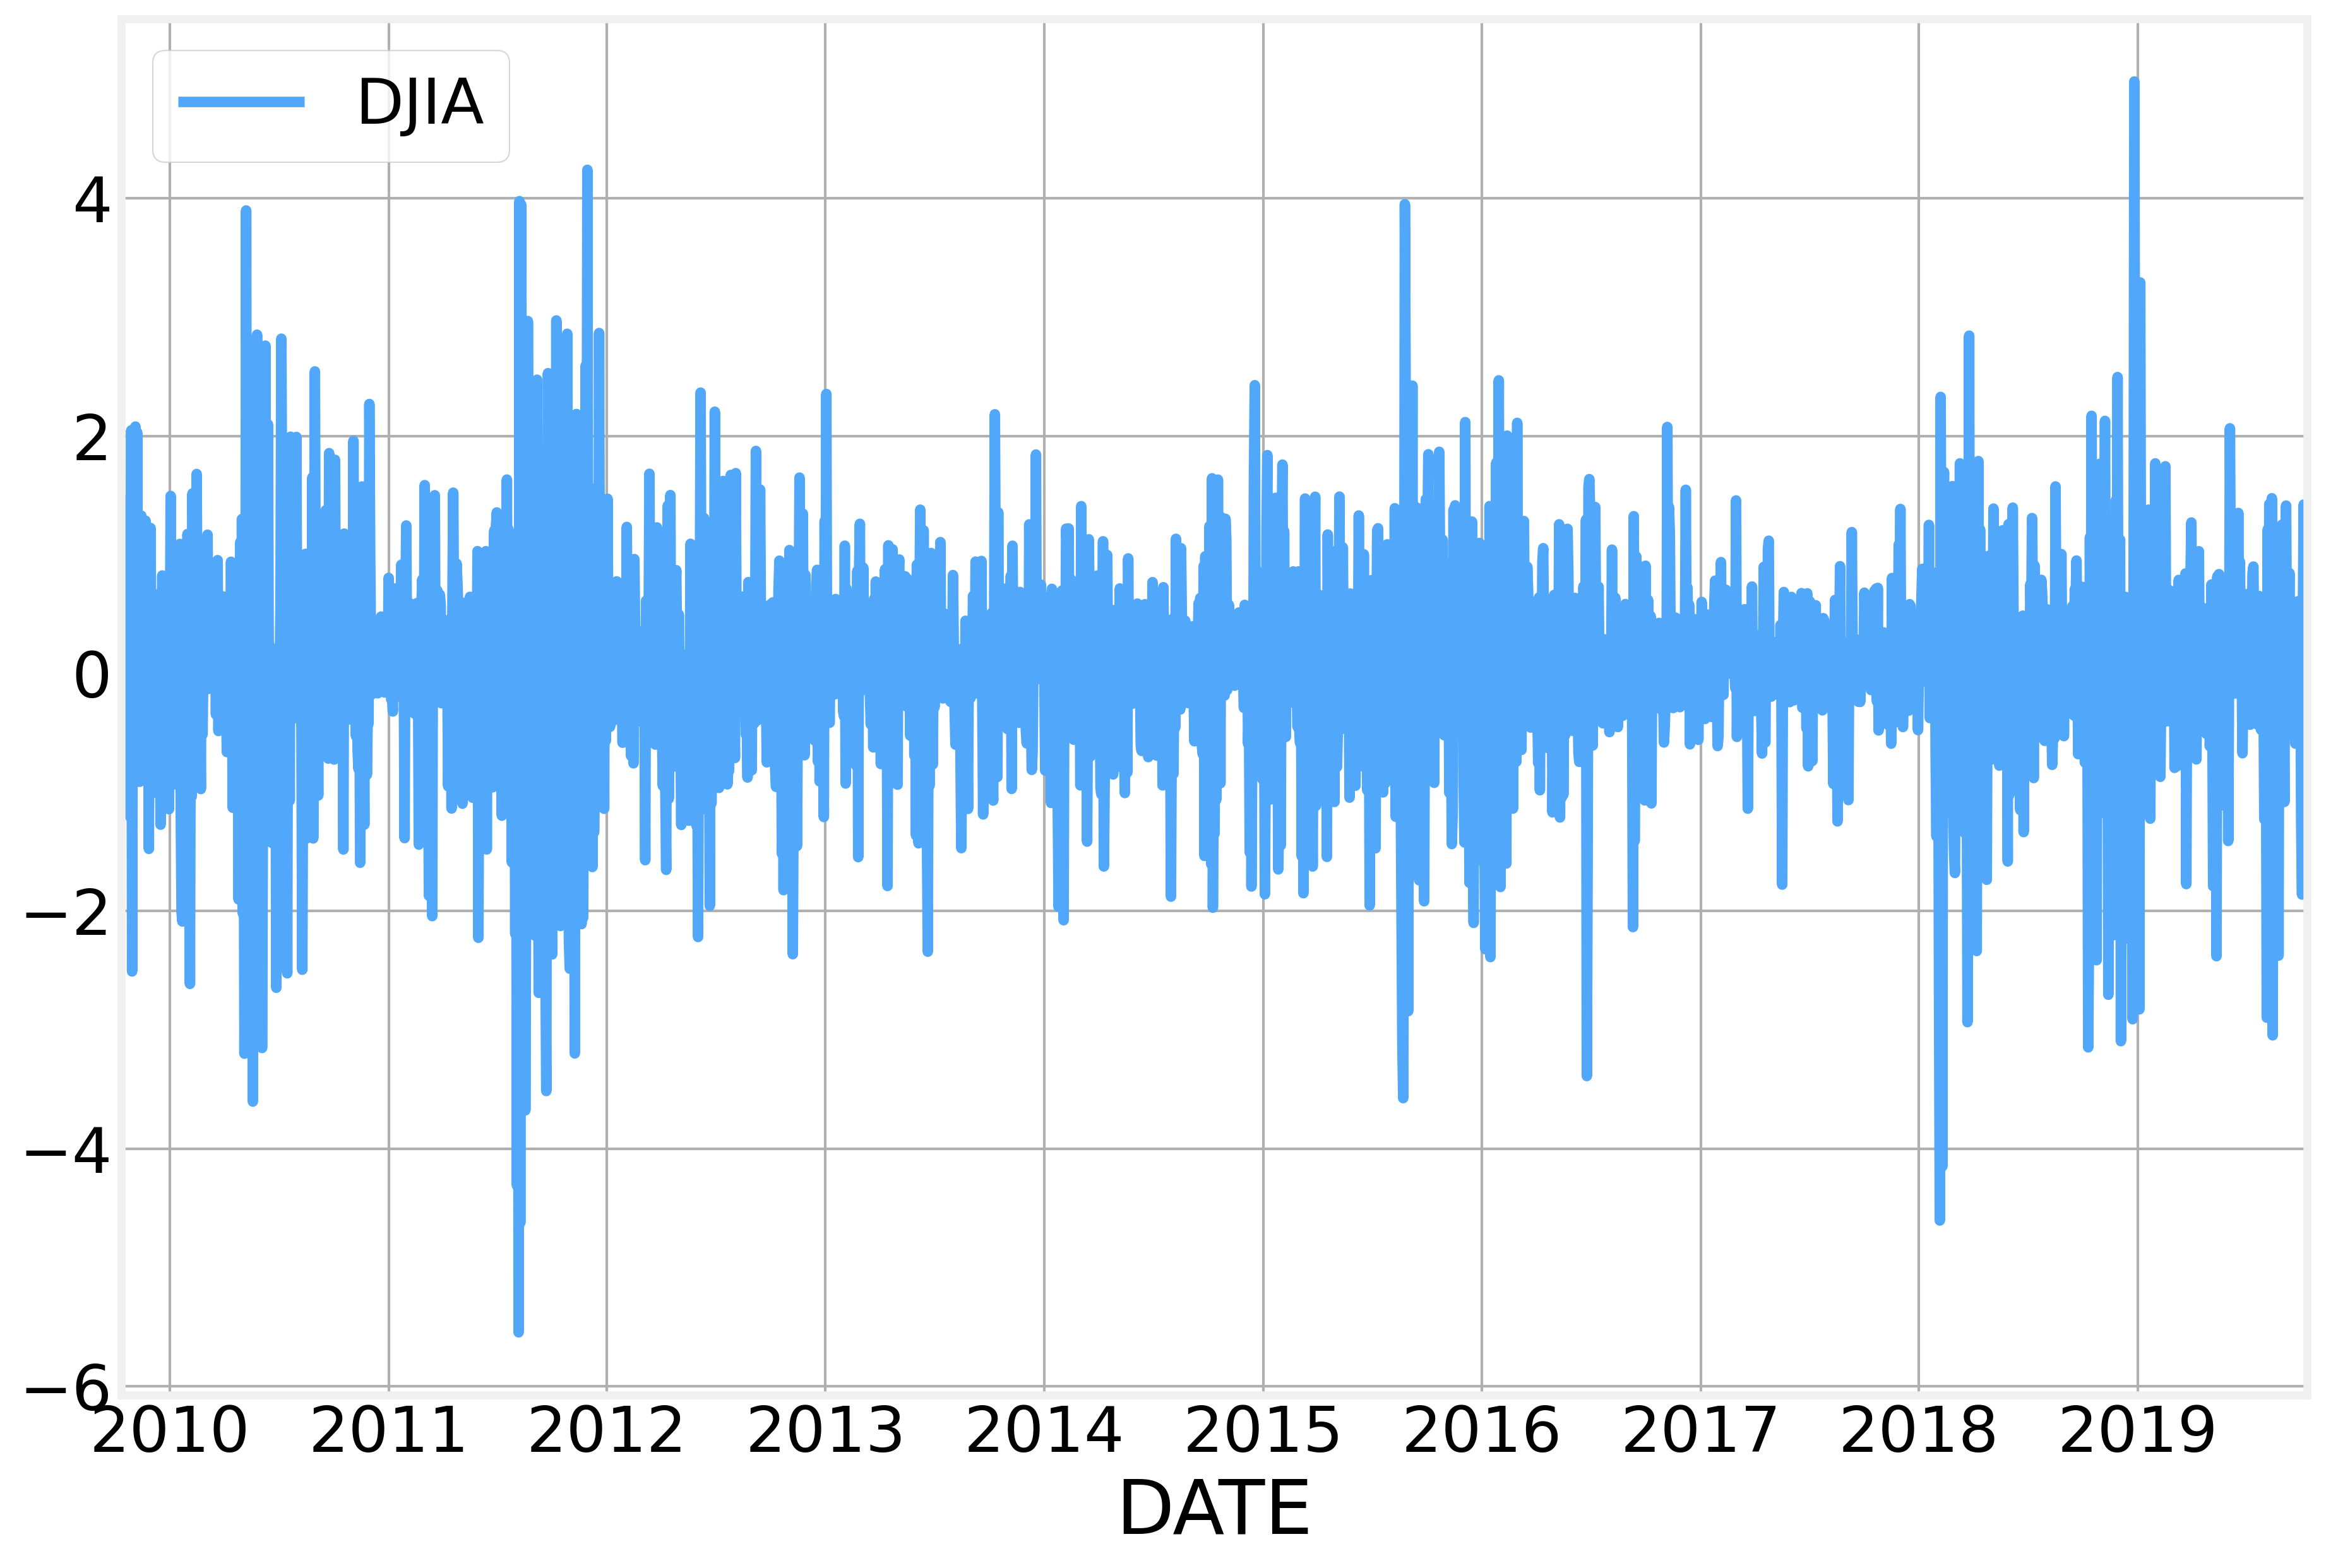

In [23]:
ax = returns.plot()

Simulate some values based on our model

In [24]:
?model.forecast

In [25]:
simulated =  model.simulate(params=results.params, nobs=2608)['data']
simulated.index = returns.index

And plot them

Text(0, 0.5, 'DoD Returns (%)')

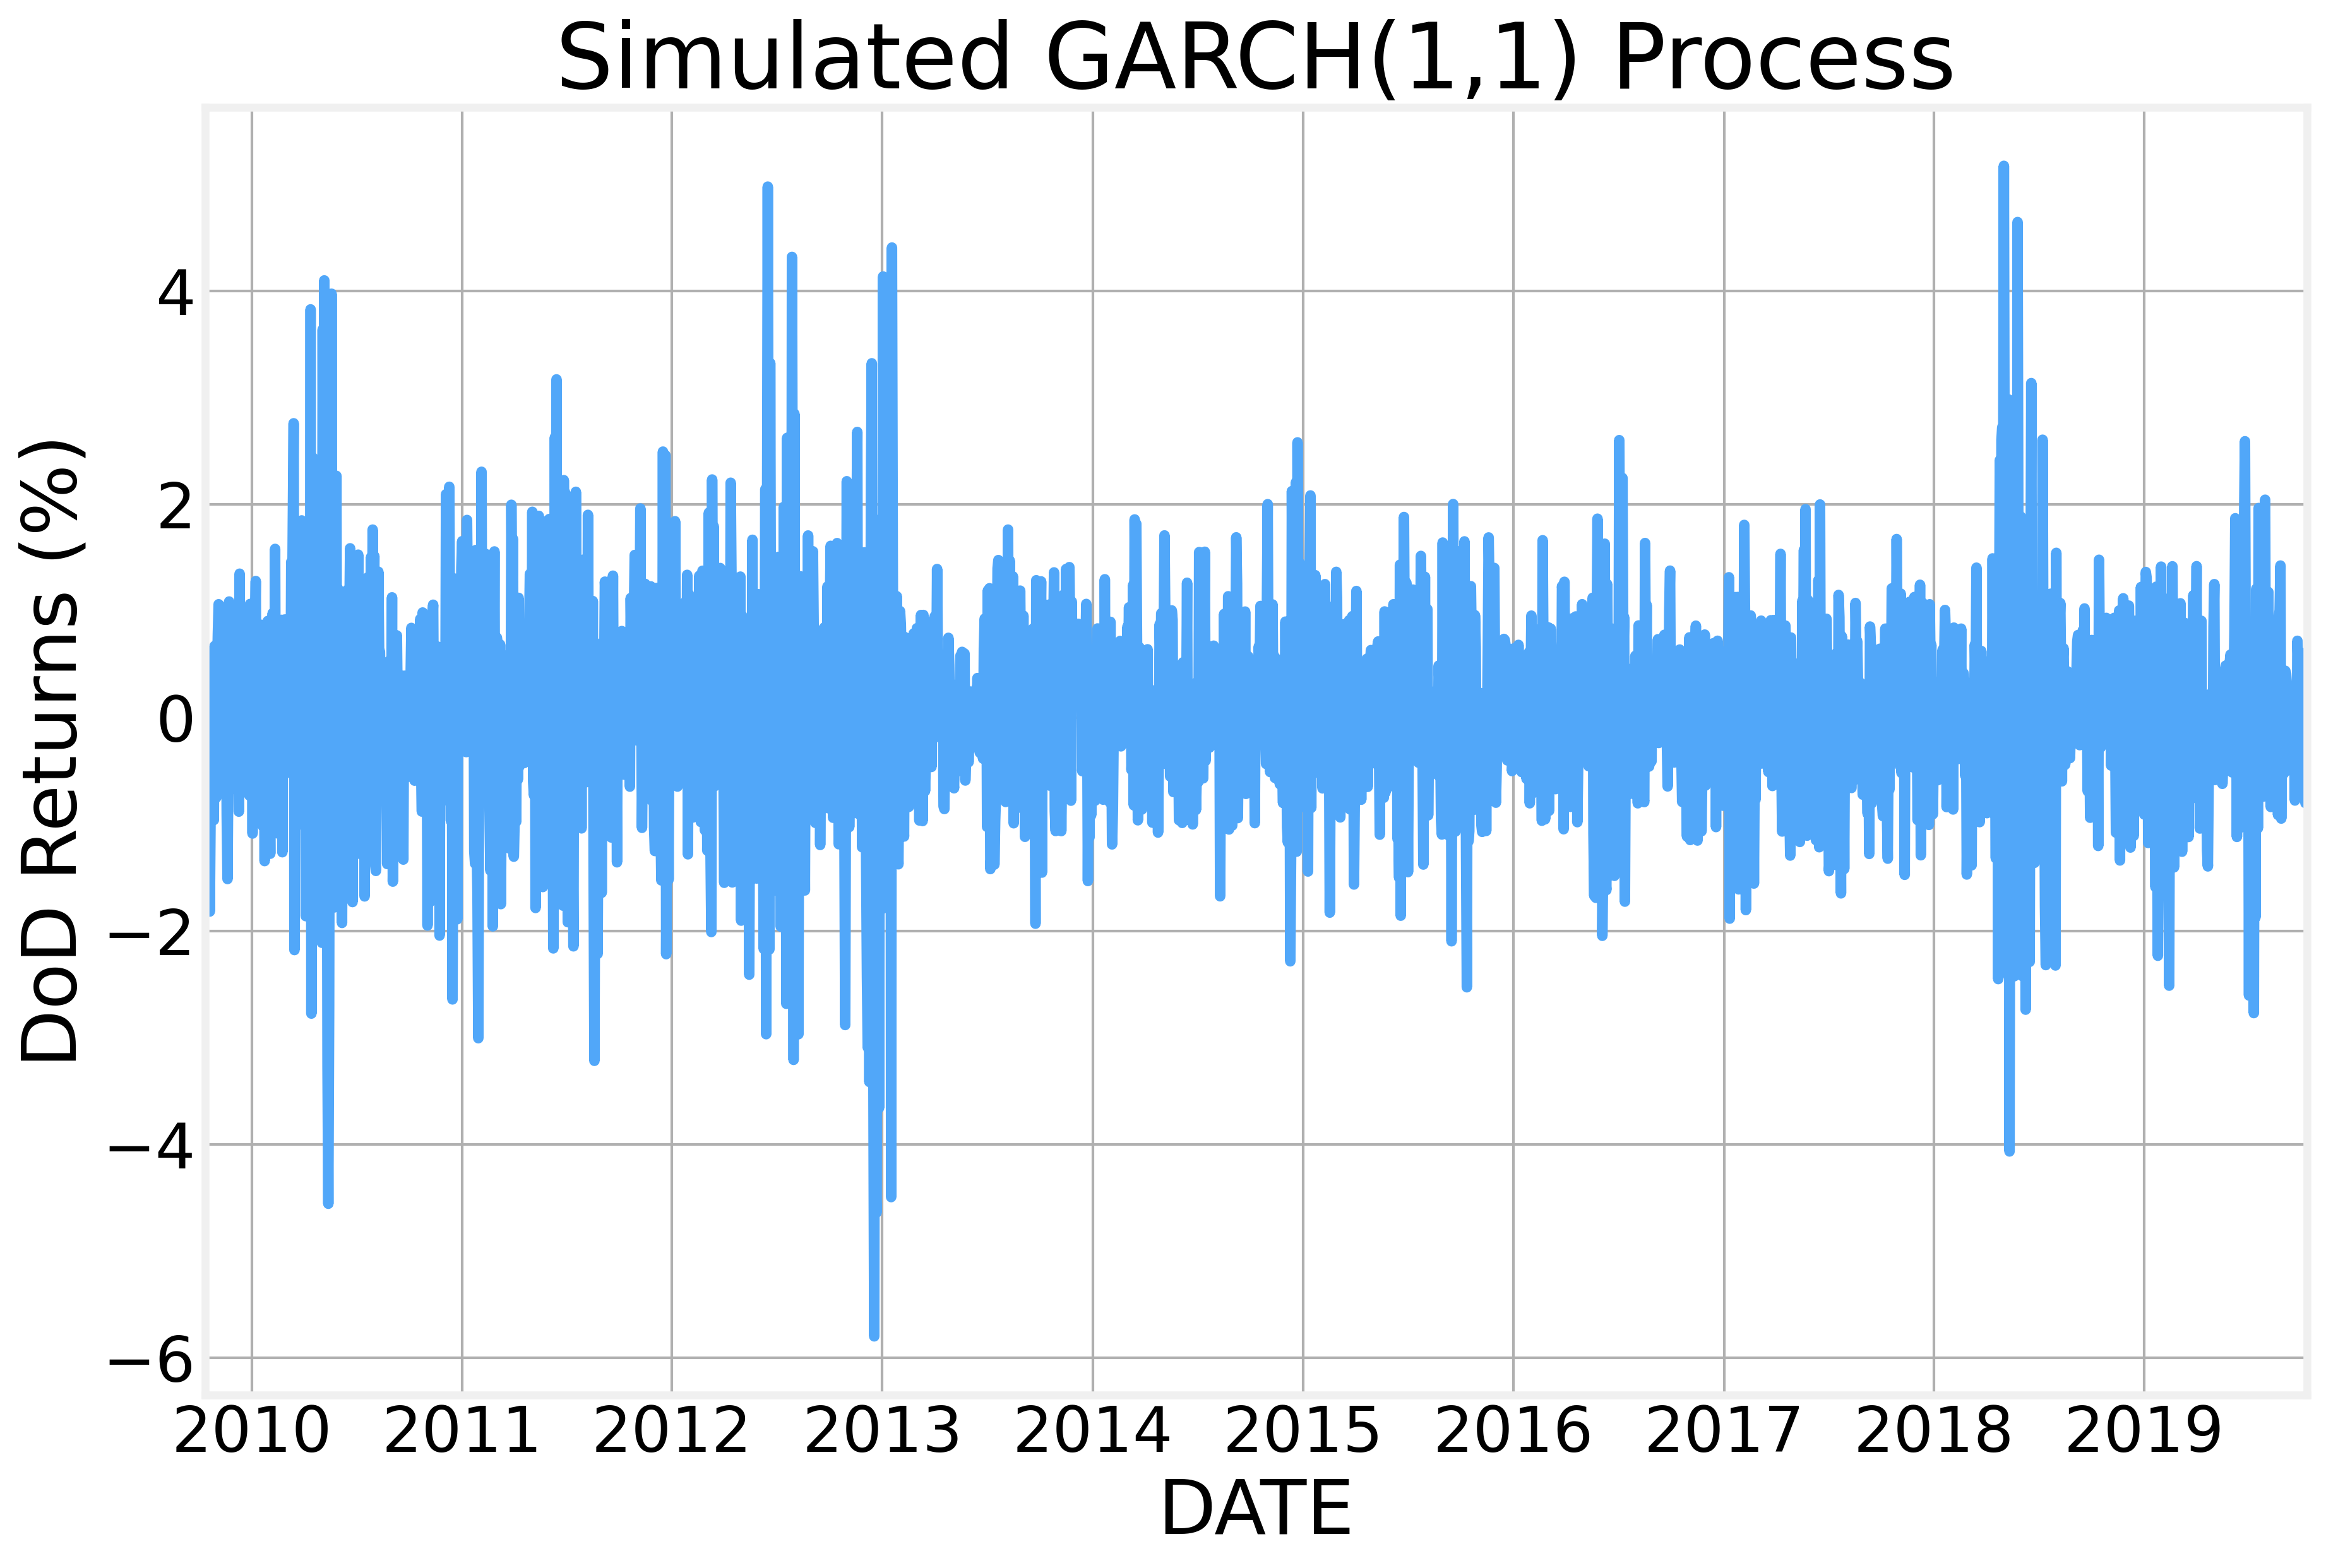

In [26]:
ax = simulated.plot()
ax.set_title('Simulated GARCH(1,1) Process')
ax.set_ylabel('DoD Returns (%)')

<div style="width: 100%; overflow: hidden;">
     <img src="data/D4Sci_logo_full.png" alt="Data For Science, Inc" align="center" border="0" width=300px> 
</div>